## DSCI-352 Lab 04

### Cassandra Man, USC ID #4731096972

## 1. YouTube Spam Filtering

### A. Download the YouTube Spam Collection Data

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

In [1]:
# Load .data file
df = pd.read_csv("../data/Youtube04-Eminem.csv", sep=",", engine="python")

# Preview data
df.head()

NameError: name 'pd' is not defined

### B. Choose the test set and training set

In [3]:
# Training set

# Filter to get all ham
df_train_H = df[df["CLASS"] == 0]

# Select the rest from ham
df_train_selectH = df_train_H.iloc[0:162]

# Filter to get all spam
df_train_S = df[df["CLASS"] == 1]

# Select the rest from spam
df_train_selectS = df_train_S.iloc[0:196]

# Merge into training set
df_train = pd.concat([df_train_selectH, df_train_selectS])
df_train

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
5,z133yfmjdur4dvyjr04ceh2osl2fvngrqi4,Darrion Johnson,2015-05-29T01:27:30.360000,Wow this video almost has a billion views! Did...,0
7,z12vxdzzds2kzzrzq04cdjc4ozq2szuyl5o,Damax,2015-05-29T00:41:22.426000,Almost 1 billion﻿,0
9,z132wd4ywmicxj2gn04cdfhilyryjhmjhk00k,JuanPa Rap,2015-05-28T23:23:41.231000,Eminem is idol for very people in España and M...,0
...,...,...,...,...,...
337,LneaDw26bFvA7_ot-Z3kQHP4GTE3g_Zc2fsfdZ4COpI,Adam B,NaN,adam b beats check out my page 2013,1
338,LneaDw26bFtdk45hGIs0TDD3NHx1srFG99yWWbEIXG0,Domen Kristan,NaN,CHECK OUT THESE LYRICS /watch?v=yUTTX04oyqQ,1
340,LneaDw26bFsPpgYyHcGAJk2dyALknpZ1ITQKBmY32HI,Chelsea Cameron,NaN,*****PLEASE READ***** Hey everyone! I&#39;m a...,1
342,LneaDw26bFuiTZZU8HrWJPqWfqnrKTtUXy7-rTnPwfU,Lil M,NaN,Hi I&#39;m lil m !!! Check out love the way yo...,1


In [4]:
# Test set

# Filter to get all ham
df_test_H = df[df["CLASS"] == 0]

# Select first 30 rows from ham
df_test_selectH = df_test_H.iloc[162:]

# Filter to get all spam
df_test_S = df[df["CLASS"] == 1]

# Select first 50 rows from spam
df_test_selectS = df_test_S.iloc[196:]

# Merge into test set
df_test = pd.concat([df_test_selectH, df_test_selectS])
df_test

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
370,z12kf5dyltrijhepb04ccltibzijd5wa1mc0k,liu hui (dukegod),2015-05-21T05:12:43.987000,i love this song﻿,0
371,z13ihhrakmndxblzo04chpp53nn2xbja1fc,Emma Halbrook,2015-05-21T04:46:05.790000,My favorite song 💗💗💗💗﻿,0
374,z13ehf4g5z2rivxhm04cfjdyhl2kwljzsjs,Andrés Nuñez,2015-05-21T02:11:54.710000,super﻿,0
381,z12gdzyrqwvtvxfek230jnvp1zf4hjl3w,Carolina Sanchez Cifuentes,2015-05-21T01:06:57.289000,Love you﻿,0
385,z12qg5voponpgxwot04ci3txdw24ejr431g,Jp Galeanoo,2015-05-21T01:05:43.761000,I love you Eminem﻿,0
...,...,...,...,...,...
440,LneaDw26bFv4NFg1m91sL1Aq1p-2N06VweQT4vOwTqc,Ando Nesia - | MC | Music Producer,NaN,DO YOU KNOW HOW SEAN KINGSTON GOT FAMOUS WHY D...,1
442,LneaDw26bFsVQRSG0ecctIfRIn4Od1tJqvnhDwCNqbI,the34104,NaN,check out eminem latest track survival if u didnt,1
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1


### C. Represent each comment using TF-IDF features

In [5]:
# Get list of comments for train set
comments_train = df_train["CONTENT"]
corpus_train = comments_train.tolist()

In [6]:
# TFIDF
vectorizer_train = TfidfVectorizer()
x_train = vectorizer_train.fit_transform(corpus_train)
print("Feature names: ", vectorizer_train.get_feature_names())
print("X.shape: ", x_train.shape)

Feature names:  ['00', '000', '047000', '09', '10', '100', '100877300245414', '11', '12', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1b', '1billion', '200', '2008', '200k', '2010', '2013', '2014', '2015', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2nd', '2zme8f', '30', '365', '36loseweight', '39', '3rd', '4000', '41', '43', '447935454150', '45', '46', '476000', '490', '4e', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '87', '90', 'abbas', 'ablaze', 'about', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'advance', 'advertise', 'advertisements', 'afraid', 'aftermath', 'again', 'ago', 'agree', 'agreeable', 'album', 'alcoholic', 'alfred',

In [7]:
x_train_df = pd.DataFrame(x_train.toarray())
x_train_df

,0,1,2,3,4,5,6,7,8,9,...,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.551119,0.0,0.0,0.0
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [8]:
# Get list of comments for test set
comments_test = df_test["CONTENT"]
corpus_test = comments_test.tolist()

In [9]:
# TFIDF
x_test = vectorizer_train.transform(corpus_test)
print("Feature names: ", vectorizer_train.get_feature_names())
print("X.shape: ", x_test.shape)

Feature names:  ['00', '000', '047000', '09', '10', '100', '100877300245414', '11', '12', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1b', '1billion', '200', '2008', '200k', '2010', '2013', '2014', '2015', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2nd', '2zme8f', '30', '365', '36loseweight', '39', '3rd', '4000', '41', '43', '447935454150', '45', '46', '476000', '490', '4e', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '87', '90', 'abbas', 'ablaze', 'about', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'advance', 'advertise', 'advertisements', 'afraid', 'aftermath', 'again', 'ago', 'agree', 'agreeable', 'album', 'alcoholic', 'alfred',

In [10]:
x_test_df = pd.DataFrame(x_test.toarray())
x_test_df

,0,1,2,3,4,5,6,7,8,9,...,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### D. L2-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [11]:
# Define independent and dependent variables
# The independent variable is x_train_df
y_train = df_train["CLASS"]

In [12]:
# Set up lamda values
lambda_values = []
for i in range (-5, 6):
    lambda_values.append(pow(10,i))

c = []
for i in lambda_values:
    c.append(1/i)
print("C:", c)

C: [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]


In [13]:
# Set up parameters
penalty_l2 = ["l2"]

parameters_l2 = {"C": c, 
              "penalty": penalty_l2, 
              "solver":["liblinear"]}

logistic = linear_model.LogisticRegression()

In [14]:
# Cross Validation
gridcv_l2_train = GridSearchCV(logistic, parameters_l2, cv = 5)
best_model_l2_train = gridcv_l2_train.fit(x_train_df, y_train)
best_c_l2_train = best_model_l2_train.best_estimator_.get_params()["C"]
print("Best C: ", best_model_l2_train.best_estimator_.get_params()["C"])

Best C:  100.0


In [15]:
# Convert back to lamda value
index_c_l2 = c.index(100.0)
lambda_conversion_l2 = lambda_values[index_c_l2]
print("Best lambda: ", lambda_conversion_l2)

Best lambda:  0.01


#### ii. Train L-2 Penalized Logistic Regression

In [16]:
# Logistic Regression
logreg_l2_train = LogisticRegression(penalty = "l2", C = best_c_l2_train, solver = "liblinear")
logreg_l2_train.fit(x_train_df, y_train)
y_logreg_pred_l2_train = logreg_l2_train.predict(x_train_df)

In [17]:
# Calculate accuracy
print(metrics.accuracy_score(y_train, y_logreg_pred_l2_train))

1.0


In [18]:
# Confusion matrix
cm_l2_train = confusion_matrix(y_train, y_logreg_pred_l2_train)
cm_l2_train

array([[162,   0],
       [  0, 196]])

In [19]:
# Get values for true negative, false positive, false negative, and true positive
tn_l2_train = cm_l2_train[0][0]
fp_l2_train = cm_l2_train[0][1]
fn_l2_train = cm_l2_train[1][0]
tp_l2_train = cm_l2_train[1][1]

In [20]:
# Calculate precision
precision_l2_train = tp_l2_train/(tp_l2_train + fp_l2_train)
precision_l2_train

1.0

In [21]:
# Calculate recall
recall_l2_train = tp_l2_train/(tp_l2_train + fn_l2_train)
recall_l2_train

1.0

In [22]:
# Calculate f1-score
f1_l2_train = 2*((precision_l2_train*recall_l2_train)/(precision_l2_train+recall_l2_train))
f1_l2_train

1.0

In [23]:
# ROC
fpr_l2_train, tpr_l2_train, _ = roc_curve(y_train, y_logreg_pred_l2_train, pos_label=1)

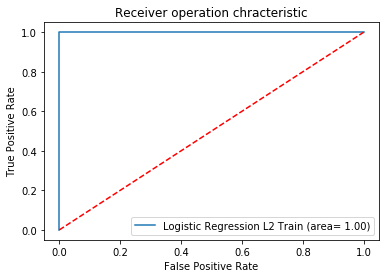

In [24]:
# Plot ROC and AUC
l2_roc_auc_train = roc_auc_score(y_train, y_logreg_pred_l2_train)

plt.figure()
plt.plot(fpr_l2_train, tpr_l2_train, label="Logistic Regression L2 Train (area= %0.2f)" % l2_roc_auc_train)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### iii. Test L-2 Penalized Logistic Regression

In [25]:
# Define independent and dependent variables
# The independent variable is x_test_df
y_test = df_test["CLASS"]

In [26]:
# Logistic Regression
y_logreg_pred_l2_test = logreg_l2_train.predict(x_test_df)

In [27]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_logreg_pred_l2_test))

0.9777777777777777


In [28]:
# Confusion matrix
cm_l2_test = confusion_matrix(y_test, y_logreg_pred_l2_test)
cm_l2_test

array([[40,  1],
       [ 1, 48]])

In [29]:
# Get values for true negative, false positive, false negative, and true positive
tn_l2_test = cm_l2_test[0][0]
fp_l2_test = cm_l2_test[0][1]
fn_l2_test = cm_l2_test[1][0]
tp_l2_test = cm_l2_test[1][1]

In [30]:
# Calculate precision
precision_l2_test = tp_l2_test/(tp_l2_test + fp_l2_test)
precision_l2_test

0.9795918367346939

In [31]:
# Calculate recall
recall_l2_test = tp_l2_test/(tp_l2_test + fn_l2_test)
recall_l2_test

0.9795918367346939

In [32]:
# Calculate f1-score
f1_l2_test = 2*((precision_l2_test*recall_l2_test)/(precision_l2_test+recall_l2_test))
f1_l2_test

0.9795918367346939

In [33]:
# ROC
fpr_l2_test, tpr_l2_test, _ = roc_curve(y_test, y_logreg_pred_l2_test, pos_label=1)

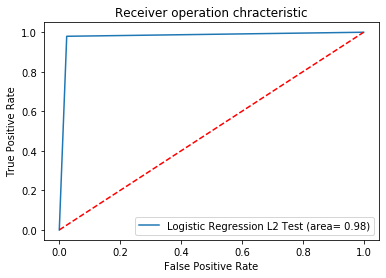

In [34]:
# Plot ROC and AUC
l2_roc_auc_test = roc_auc_score(y_test, y_logreg_pred_l2_test)

plt.figure()
plt.plot(fpr_l2_test, tpr_l2_test, label="Logistic Regression L2 Test (area= %0.2f)" % l2_roc_auc_test)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

In [35]:
# Calculate F-beta score for beta in {0.1, 0.5, 0.9, 1, 5, 10}
fbeta_1 = fbeta_score(y_test, y_logreg_pred_l2_test, beta = 0.1)
fbeta_2 = fbeta_score(y_test, y_logreg_pred_l2_test, beta = 0.5)
fbeta_3 = fbeta_score(y_test, y_logreg_pred_l2_test, beta = 0.9)
fbeta_4 = fbeta_score(y_test, y_logreg_pred_l2_test, beta = 1)
fbeta_5 = fbeta_score(y_test, y_logreg_pred_l2_test, beta = 5)
fbeta_6 = fbeta_score(y_test, y_logreg_pred_l2_test, beta = 10)
print("F-beta score for beta = 0.1 : ", fbeta_1)
print("F-beta score for beta = 0.5 : ", fbeta_2)
print("F-beta score for beta = 0.9 : ", fbeta_3)
print("F-beta score for beta = 1 : ", fbeta_4)
print("F-beta score for beta = 5 : ", fbeta_5)
print("F-beta score for beta = 10 : ", fbeta_6)

F-beta score for beta = 0.1 :  0.9795918367346939
F-beta score for beta = 0.5 :  0.979591836734694
F-beta score for beta = 0.9 :  0.9795918367346939
F-beta score for beta = 1 :  0.9795918367346939
F-beta score for beta = 5 :  0.9795918367346939
F-beta score for beta = 10 :  0.9795918367346939


The F-beta score is the weighted harmonic mean of precision and recall, and the closer the F-beta score is to 1 the better it is. 
The value of beta used determines the weight of recall, and having beta < 1 means more weight is given to precision, while beta > 1 mean more weight is given to recall.

Therefore, we would have determined the beta value for which the F-beta score was highest. If that beta value was below 1, we would say that precision is more important. On the other hand, if that beta value was greater than 1, we would say that recall is more important.

However, because all the F-beta scores are the same in this case, it suggests that in a numerical sense, precision and recall are equally important (which is consistent with the fact that the precision and recall values are the same at 0.9795918367346939).

However, if we consider the real-world applications of a spam-ham classifier, misclassifying a spam comment as ham (accidentally displaying a spam comment in the comments section) is arguably preferable to misclassifying a ham comment as spam (accidentally removing important comments in the comments section), so precision is more important in this application.

### E. L1-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [36]:
# Set up parameters
logistic_l1 = linear_model.LogisticRegression()
penalty_l1 = ["l1"]
parameters_l1 = {"C": c, 
              "penalty": penalty_l1, 
              "solver":["liblinear"]}

In [37]:
# Cross Validation
gridcv_l1_train = GridSearchCV(logistic_l1, parameters_l1, cv = 5)
best_model_l1_train = gridcv_l1_train.fit(x_train_df, y_train)
best_c_l1_train = best_model_l1_train.best_estimator_.get_params()["C"]
print("Best C: ", best_c_l1_train)

Best C:  1000.0


In [336]:
# Convert back to lamda value
index_c_l1 = c.index(1000.0)
lambda_conversion_l1 = lambda_values[index_c_l1]
print("Best lambda: ", lambda_conversion_l1)

Best lambda:  0.001


#### ii. Train L-1 Penalized Logistic Regression

In [39]:
# Logistic Regression
logreg_l1_train = LogisticRegression(penalty = "l1", C = best_c_l1_train, solver = "liblinear")
logreg_l1_train.fit(x_train_df, y_train)
y_logreg_pred_l1_train = logreg_l1_train.predict(x_train_df)

In [40]:
# Calculate accuracy
print(metrics.accuracy_score(y_train, y_logreg_pred_l1_train))

1.0


In [41]:
# Confusion matrix
cm_l1_train = confusion_matrix(y_train, y_logreg_pred_l1_train)
cm_l1_train

array([[162,   0],
       [  0, 196]])

In [42]:
# Get values for true negative, false positive, false negative, and true positive
tn_l1_train = cm_l1_train[0][0]
fp_l1_train = cm_l1_train[0][1]
fn_l1_train = cm_l1_train[1][0]
tp_l1_train = cm_l1_train[1][1]

In [43]:
# Calculate precision
precision_l1_train = tp_l1_train/(tp_l1_train + fp_l1_train)
precision_l1_train

1.0

In [44]:
# Calculate recall
recall_l1_train = tp_l1_train/(tp_l1_train + fn_l1_train)
recall_l1_train

1.0

In [45]:
# Calculate f1-score
f1_l1_train = 2*((precision_l1_train*recall_l1_train)/(precision_l1_train+recall_l1_train))
f1_l1_train

1.0

In [46]:
# ROC
fpr_l1_train, tpr_l1_train, _ = roc_curve(y_train, y_logreg_pred_l1_train, pos_label=1)

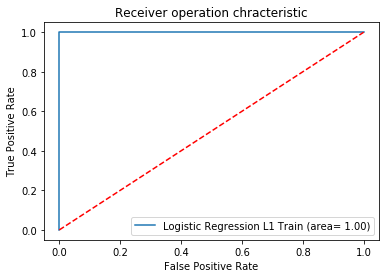

In [47]:
# Plot ROC and AUC
l1_roc_auc_train = roc_auc_score(y_train, y_logreg_pred_l1_train)

plt.figure()
plt.plot(fpr_l1_train, tpr_l1_train, label="Logistic Regression L1 Train (area= %0.2f)" % l1_roc_auc_train)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### iii. Test L-1 Penalized Logistic Regression

In [48]:
# Define independent and dependent variables
# The independent variable is x_test_df
# The dependent variable is y_test

In [49]:
# Logistic Regression
y_logreg_pred_l1_test = logreg_l1_train.predict(x_test_df)

In [50]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_logreg_pred_l1_test))

0.9666666666666667


In [51]:
# Confusion matrix
cm_l1_test = confusion_matrix(y_test, y_logreg_pred_l1_test)
cm_l1_test

array([[41,  0],
       [ 3, 46]])

In [52]:
# Get values for true negative, false positive, false negative, and true positive
tn_l1_test = cm_l1_test[0][0]
fp_l1_test = cm_l1_test[0][1]
fn_l1_test = cm_l1_test[1][0]
tp_l1_test = cm_l1_test[1][1]

In [53]:
# Calculate precision
precision_l1_test = tp_l1_test/(tp_l1_test + fp_l1_test)
precision_l1_test

1.0

In [54]:
# Calculate recall
recall_l1_test = tp_l1_test/(tp_l1_test + fn_l1_test)
recall_l1_test

0.9387755102040817

In [55]:
# Calculate f1-score
f1_l1_test = 2*((precision_l1_test*recall_l1_test)/(precision_l1_test+recall_l1_test))
f1_l1_test

0.968421052631579

In [56]:
# ROC
fpr_l1_test, tpr_l1_test, _ = roc_curve(y_test, y_logreg_pred_l1_test, pos_label=1)

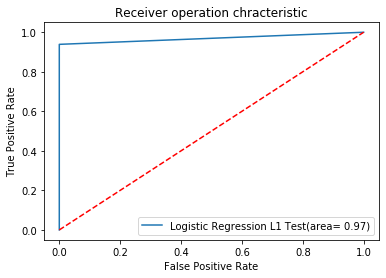

In [57]:
# Plot ROC and AUC
l1_roc_auc_test = roc_auc_score(y_test, y_logreg_pred_l1_test)

plt.figure()
plt.plot(fpr_l1_test, tpr_l1_test, label="Logistic Regression L1 Test(area= %0.2f)" % l1_roc_auc_test)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### F. Binary Classification Using Naive Bayes Classifiers

#### For training

In [58]:
# Naive Bayes
gnb_train = GaussianNB()
gnb_train.fit(x_train_df, y_train)
y_pred_gnb_train = gnb_train.predict(x_train_df)

In [59]:
# Calculate accuracy
print(metrics.accuracy_score(y_train, y_pred_gnb_train))

0.9972067039106145


In [60]:
# Confusion matrix
cm_gnb_train = confusion_matrix(y_train, y_pred_gnb_train)
cm_gnb_train

array([[162,   0],
       [  1, 195]])

In [61]:
# Get values for true negative, false positive, false negative, and true positive
tn_gnb_train = cm_gnb_train[0][0]
fp_gnb_train = cm_gnb_train[0][1]
fn_gnb_train = cm_gnb_train[1][0]
tp_gnb_train = cm_gnb_train[1][1]

In [62]:
# Calculate precision
precision_gnb_train = tp_gnb_train/(tp_gnb_train + fp_gnb_train)
precision_gnb_train

1.0

In [63]:
# Calculate recall
recall_gnb_train = tp_gnb_train/(tp_gnb_train + fn_gnb_train)
recall_gnb_train

0.9948979591836735

In [64]:
# Calculate f1-score
f1_gnb_train = 2*((precision_gnb_train*recall_gnb_train)/(precision_gnb_train+recall_gnb_train))
f1_gnb_train

0.9974424552429668

In [65]:
# ROC
fpr_gnb_train, tpr_gnb_train, _ = roc_curve(y_train, y_pred_gnb_train, pos_label=1)

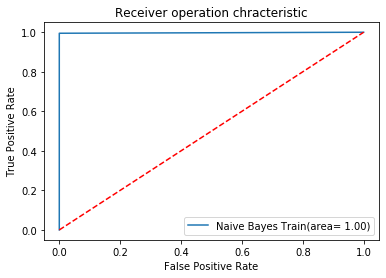

In [66]:
# Plot ROC and AUC
gnb_roc_auc_train = roc_auc_score(y_train, y_pred_gnb_train)

plt.figure()
plt.plot(fpr_gnb_train, tpr_gnb_train, label="Naive Bayes Train(area= %0.2f)" % gnb_roc_auc_train)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### For test

In [67]:
# Naive Bayes
y_pred_gnb_test = gnb_train.predict(x_test_df)

In [68]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_gnb_test))

0.9222222222222223


In [69]:
# Confusion matrix
cm_gnb_test = confusion_matrix(y_test, y_pred_gnb_test)
cm_gnb_test

array([[35,  6],
       [ 1, 48]])

In [70]:
# Get values for true negative, false positive, false negative, and true positive
tn_gnb_test = cm_gnb_test[0][0]
fp_gnb_test = cm_gnb_test[0][1]
fn_gnb_test = cm_gnb_test[1][0]
tp_gnb_test = cm_gnb_test[1][1]

In [71]:
# Calculate precision
precision_gnb_test = tp_gnb_test/(tp_gnb_test + fp_gnb_test)
precision_gnb_test

0.8888888888888888

In [72]:
# Calculate recall
recall_gnb_test = tp_gnb_test/(tp_gnb_test + fn_gnb_test)
recall_gnb_test

0.9795918367346939

In [73]:
# Calculate f1-score
f1_gnb_test = 2*((precision_gnb_test*recall_gnb_test)/(precision_gnb_test+recall_gnb_test))
f1_gnb_test

0.9320388349514563

In [74]:
# ROC
fpr_gnb_test, tpr_gnb_test, _ = roc_curve(y_test, y_pred_gnb_test, pos_label=1)

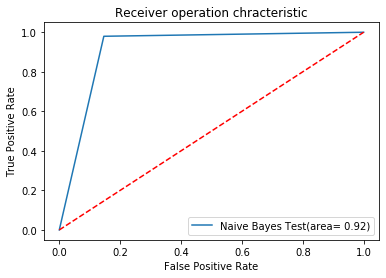

In [75]:
# Plot ROC and AUC
gnb_roc_auc_test = roc_auc_score(y_test, y_pred_gnb_test)

plt.figure()
plt.plot(fpr_gnb_test, tpr_gnb_test, label="Naive Bayes Test(area= %0.2f)" % gnb_roc_auc_test)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### Extra Credit: G. Multinomial Priors

For training data

In [76]:
# Multinomial Naive Bayes
multi_train = MultinomialNB()
multi_train.fit(x_train_df, y_train)
y_multi_pred_train = multi_train.predict(x_train_df)

In [77]:
# Calculate accuracy
print(metrics.accuracy_score(y_train, y_multi_pred_train))

0.9776536312849162


In [78]:
# Confusion matrix
cm_multi_train = confusion_matrix(y_train, y_multi_pred_train)
cm_multi_train

array([[155,   7],
       [  1, 195]])

In [79]:
# Get values for true negative, false positive, false negative, and true positive
tn_multi_train = cm_multi_train[0][0]
fp_multi_train = cm_multi_train[0][1]
fn_multi_train = cm_multi_train[1][0]
tp_multi_train = cm_multi_train[1][1]

In [80]:
# Calculate precision
precision_multi_train = tp_multi_train/(tp_multi_train + fp_multi_train)
precision_multi_train

0.9653465346534653

In [81]:
# Calculate recall
recall_multi_train = tp_multi_train/(tp_multi_train + fn_multi_train)
recall_multi_train

0.9948979591836735

In [82]:
# Calculate f1-score
f1_multi_train = 2*((precision_multi_train*recall_multi_train)/(precision_multi_train+recall_multi_train))
f1_multi_train

0.9798994974874372

In [83]:
# ROC
fpr_multi_train, tpr_multi_train, _ = roc_curve(y_train, y_multi_pred_train, pos_label=1)

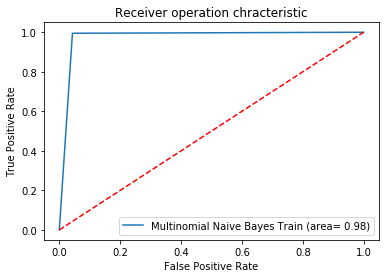

In [84]:
# Plot ROC and AUC
multi_roc_auc_train = roc_auc_score(y_train, y_multi_pred_train)

plt.figure()
plt.plot(fpr_multi_train, tpr_multi_train, label="Multinomial Naive Bayes Train (area= %0.2f)" % multi_roc_auc_train)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

For test data

In [85]:
# Multinomial Naive Bayes
multi_test = MultinomialNB()
multi_test.fit(x_train_df, y_train)
y_multi_pred_test = multi_test.predict(x_test_df)

In [86]:
# Calculate accuracy
print(metrics.accuracy_score(y_test, y_multi_pred_test))

0.9


In [87]:
# Confusion matrix
cm_multi_test = confusion_matrix(y_test, y_multi_pred_test)
cm_multi_test

array([[32,  9],
       [ 0, 49]])

In [88]:
# Get values for true negative, false positive, false negative, and true positive
tn_multi_test = cm_multi_test[0][0]
fp_multi_test = cm_multi_test[0][1]
fn_multi_test = cm_multi_test[1][0]
tp_multi_test = cm_multi_test[1][1]

In [89]:
# Calculate precision
precision_multi_test = tp_multi_test/(tp_multi_test + fp_multi_test)
precision_multi_test

0.8448275862068966

In [90]:
# Calculate recall
recall_multi_test = tp_multi_test/(tp_multi_test + fn_multi_test)
recall_multi_test

1.0

In [91]:
# Calculate f1-score
f1_multi_test = 2*((precision_multi_test*recall_multi_test)/(precision_multi_test+recall_multi_test))
f1_multi_test

0.9158878504672897

In [92]:
# ROC
fpr_multi_test, tpr_multi_test, _ = roc_curve(y_test, y_multi_pred_test, pos_label=1)

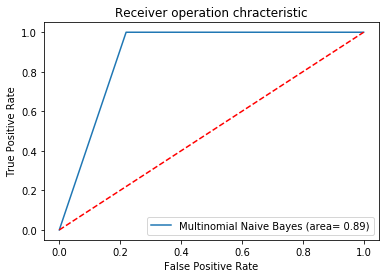

In [93]:
# Plot ROC and AUC
multi_roc_auc_test = roc_auc_score(y_test, y_multi_pred_test)

plt.figure()
plt.plot(fpr_multi_test, tpr_multi_test, label="Multinomial Naive Bayes (area= %0.2f)" % multi_roc_auc_test)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### Extra Credit: H. Tables for All Data Sets

Scroll to bottom for tables

### Code for the tables: 

### Shakira

#### A. Download the YouTube Spam Collection Data

In [94]:
# Load .data file
df_sh = pd.read_csv("../data/Youtube05-Shakira.csv",sep=",", engine="python")

# Preview data
df_sh.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


#### B. Choose the test set and training set

In [95]:
# Training set

# Filter to get all ham
df_train_H_sh = df_sh[df_sh["CLASS"] == 0]

# Select the rest from ham
df_train_selectH_sh = df_train_H_sh.iloc[0:156]

# Filter to get all spam
df_train_S_sh = df_sh[df_sh["CLASS"] == 1]

# Select the rest from spam
df_train_selectS_sh = df_train_S_sh.iloc[0:139]

# Merge into training set
df_train_sh = pd.concat([df_train_selectH_sh, df_train_selectS_sh])
df_train_sh

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
...,...,...,...,...,...
316,_2viQ_Qnc69swE48B0wgwJijgdZ2KbSVUK5TSpqoYDg,Mazacar Cfc,2013-08-13T20:01:56.702000,subscribe to my pagee please.,1
317,_2viQ_Qnc69TuQDH0yVDsXPiyJCNNBrDiYhDY66Xu8g,Stanša Matej,2013-08-13T19:18:54.893000,please subscribe to my page. thanks.,1
318,_2viQ_Qnc6870xv47G-__kc0IimrvnGFcLXaLnJsiFE,Edward Wright,2013-08-11T05:23:08.533000,"Hey, hit this shit up while yall can, they kil...",1
319,_2viQ_Qnc6-qc6sKOH4U0o8eIL4tVjojc-DyDYkkvWk,Comedy Recipe,2013-08-11T03:40:42.801000,Hey guys and girls check out Comedy Recipe for...,1


In [96]:
# Test set

# Filter to get all ham
df_test_H_sh = df_sh[df_sh["CLASS"] == 0]

# Select first 30 rows from ham
df_test_selectH_sh = df_test_H_sh.iloc[156:]

# Filter to get all spam
df_test_S_sh = df_sh[df_sh["CLASS"] == 1]

# Select first 50 rows from spam
df_test_selectS_sh = df_test_S_sh.iloc[139:]

# Merge into test set
df_test_sh = pd.concat([df_test_selectH_sh, df_test_selectS_sh])
df_test_sh

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
243,_2viQ_Qnc6_eGfHB415UkNWBszO-GzLm9_Q0_qWsNLI,annabelle dalal,2013-10-02T03:50:46.921000,She is good,0
244,_2viQ_Qnc6-uO31Z6WO5RUUpcrJ43ISst2uruk4y6TI,viginas smell like fish,2013-10-02T03:16:47.796000,God she is so hot,0
245,_2viQ_Qnc6_XQHOjsmnALH1Quwy3tmW6KKW67LkNGoQ,Juan Martinez,2013-10-02T03:08:55.478000,She is perfect! &lt;3,0
246,_2viQ_Qnc6-LmEEd3Pfnu9Sr-MT4sVCt84E5BYHGnM0,mirzet beganovic,2013-10-02T02:06:20.220000,Wow,0
247,_2viQ_Qnc6-TMFClPlfFIBHdy_HbPbLyMhBsuEz5Lj8,Trang Le,2013-10-02T00:48:17.158000,Shakira voice sound spanish but that is what m...,0
...,...,...,...,...,...
357,_2viQ_Qnc6_HU65mTzCmXnjA-WLt7XqxqPj7EwAtlO0,ricky swaggz,2013-07-14T20:40:00.331000,********OMG Facebook is OLD! Check out ------...,1
358,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...,1
359,_2viQ_Qnc6_fgKR1W7-k1lbVURi8hVbMlQAMSOCSnyk,ThirdDegr3e,2013-07-13T20:48:22.967000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
360,_2viQ_Qnc69MEEHHJxZ427KX8MlljJPnUC2YBbvbWwY,ThirdDegr3e,2013-07-13T20:48:06.033000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1


#### C. Represent each comment using TF-IDF features

In [97]:
# Get list of comments for train set
comments_train_sh = df_train_sh["CONTENT"]
corpus_train_sh = comments_train_sh.tolist()

In [98]:
# TFIDF
vectorizer_train_sh = TfidfVectorizer()
x_train_sh = vectorizer_train_sh.fit_transform(corpus_train_sh)
print("Feature names: ", vectorizer_train_sh.get_feature_names())
print("X.shape: ", x_train_sh.shape)

Feature names:  ['00', '000', '0687119038', '08', '10', '100', '101721377578919894134', '108k', '128gb', '13', '14', '14gkvdo', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '1m00s', '20', '200', '200mm', '2010', '2013', '2015', '23', '25', '250', '320', '32gb', '33', '333', '35', '360', '385', '387', '39', '390', '3d', '4000', '421', '433', '4500', '4g', '4gb', '4netjobs', '4th', '50', '500', '5000', '50k', '510', '515', '55', '550', '55mm', '5tu9gn1l310', '60', '600', '682', '753', '7in', '860', '868', '9nl', 'about', 'absolutely', 'absorbing', 'account', 'acidic', 'acquire', 'acquiring', 'act', 'actually', 'adam', 'addition', 'adele', 'adf', 'admirable', 'adore', 'adroid', 'advertise', 'advertisements', 'advertisiments', 'affiliated', 'afflicted', 'africa', 'african', 'africans', 'after', 'again', 'against', 'ago', 'agree', 'ahead', 'aid', 'air', 'aka', 'all', 'alot', 'also', 'am', 'amazed', 'amazement', 'amazing', 'amazon', 'ambition', 'ambitious', 'amendment', '

In [99]:
x_train_df_sh = pd.DataFrame(x_train_sh.toarray())
x_train_df_sh

,0,1,2,3,4,5,6,7,8,9,...,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.436791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Get list of comments for test set
comments_test_sh = df_test_sh["CONTENT"]
corpus_test_sh = comments_test_sh.tolist()

In [101]:
# TFIDF
x_test_sh = vectorizer_train_sh.transform(corpus_test_sh)
print("Feature names: ", vectorizer_train_sh.get_feature_names())
print("X.shape: ", x_test_sh.shape)

Feature names:  ['00', '000', '0687119038', '08', '10', '100', '101721377578919894134', '108k', '128gb', '13', '14', '14gkvdo', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '1m00s', '20', '200', '200mm', '2010', '2013', '2015', '23', '25', '250', '320', '32gb', '33', '333', '35', '360', '385', '387', '39', '390', '3d', '4000', '421', '433', '4500', '4g', '4gb', '4netjobs', '4th', '50', '500', '5000', '50k', '510', '515', '55', '550', '55mm', '5tu9gn1l310', '60', '600', '682', '753', '7in', '860', '868', '9nl', 'about', 'absolutely', 'absorbing', 'account', 'acidic', 'acquire', 'acquiring', 'act', 'actually', 'adam', 'addition', 'adele', 'adf', 'admirable', 'adore', 'adroid', 'advertise', 'advertisements', 'advertisiments', 'affiliated', 'afflicted', 'africa', 'african', 'africans', 'after', 'again', 'against', 'ago', 'agree', 'ahead', 'aid', 'air', 'aka', 'all', 'alot', 'also', 'am', 'amazed', 'amazement', 'amazing', 'amazon', 'ambition', 'ambitious', 'amendment', '

In [102]:
x_test_df_sh = pd.DataFrame(x_test_sh.toarray())
x_test_df_sh

,0,1,2,3,4,5,6,7,8,9,...,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### D. L2-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [103]:
# Define independent and dependent variables
# The independent variable is x_train_df
y_train_sh = df_train_sh["CLASS"]

In [104]:
# Set up lamda values
lambda_values_sh = []
for i in range (-5, 6):
    lambda_values_sh.append(pow(10,i))

c_sh = []
for i in lambda_values_sh:
    c_sh.append(1/i)
print("C:", c_sh)

C: [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]


In [105]:
# Set up parameters
penalty_l2_sh = ["l2"]

parameters_l2_sh = {"C": c_sh, 
              "penalty": penalty_l2_sh, 
              "solver":["liblinear"]}

logistic_sh = linear_model.LogisticRegression()

In [106]:
# Cross Validation
gridcv_l2_train_sh = GridSearchCV(logistic_sh, parameters_l2_sh, cv = 5)
best_model_l2_train_sh = gridcv_l2_train_sh.fit(x_train_df_sh, y_train_sh)
best_c_l2_train_sh = best_model_l2_train_sh.best_estimator_.get_params()["C"]
print("Best C: ", best_model_l2_train_sh.best_estimator_.get_params()["C"])

Best C:  10.0


In [107]:
# Convert back to lamda value
index_c_l2_sh = c_sh.index(10.0)
lambda_conversion_l2_sh = lambda_values_sh[index_c_l2_sh]
print("Best lambda: ", lambda_conversion_l2_sh)

Best lambda:  0.1


#### ii. Train L-2 Penalized Logistic Regression

In [108]:
# Logistic Regression
logreg_l2_train_sh = LogisticRegression(penalty = "l2", C = best_c_l2_train_sh, solver = "liblinear")
logreg_l2_train_sh.fit(x_train_df_sh, y_train_sh)
y_logreg_pred_l2_train_sh = logreg_l2_train_sh.predict(x_train_df_sh)

#### iii. Test L-2 Penalized Logistic Regression

In [109]:
# Define independent and dependent variables
# The independent variable is x_test_df
y_test_sh = df_test_sh["CLASS"]

In [110]:
# Logistic Regression
y_logreg_pred_l2_test_sh = logreg_l2_train_sh.predict(x_test_df_sh)

In [111]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_sh, y_logreg_pred_l2_test_sh))

0.9466666666666667


In [112]:
# Confusion matrix
cm_l2_test_sh = confusion_matrix(y_test_sh, y_logreg_pred_l2_test_sh)
cm_l2_test_sh

array([[37,  3],
       [ 1, 34]])

In [113]:
# Get values for true negative, false positive, false negative, and true positive
tn_l2_test_sh = cm_l2_test_sh[0][0]
fp_l2_test_sh = cm_l2_test_sh[0][1]
fn_l2_test_sh = cm_l2_test_sh[1][0]
tp_l2_test_sh = cm_l2_test_sh[1][1]

In [114]:
# Calculate precision
precision_l2_test_sh = tp_l2_test_sh/(tp_l2_test_sh + fp_l2_test_sh)
precision_l2_test_sh

0.918918918918919

In [115]:
# Calculate recall
recall_l2_test_sh = tp_l2_test_sh/(tp_l2_test_sh + fn_l2_test_sh)
recall_l2_test_sh

0.9714285714285714

In [116]:
# Calculate f1-score
f1_l2_test_sh = 2*((precision_l2_test_sh*recall_l2_test_sh)/(precision_l2_test_sh+recall_l2_test_sh))
f1_l2_test_sh

0.9444444444444445

In [117]:
# ROC
fpr_l2_test_sh, tpr_l2_test_sh, _ = roc_curve(y_test_sh, y_logreg_pred_l2_test_sh, pos_label=1)

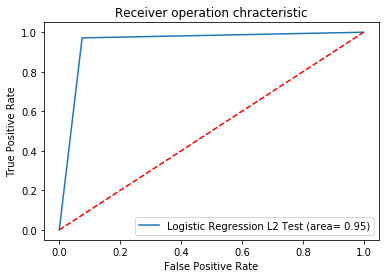

In [118]:
# Plot ROC and AUC
l2_roc_auc_test_sh = roc_auc_score(y_test_sh, y_logreg_pred_l2_test_sh)

plt.figure()
plt.plot(fpr_l2_test_sh, tpr_l2_test_sh, label="Logistic Regression L2 Test (area= %0.2f)" % l2_roc_auc_test_sh)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### E. L1-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [119]:
# Set up parameters
logistic_l1_sh = linear_model.LogisticRegression()
penalty_l1_sh = ["l1"]
parameters_l1_sh = {"C": c_sh, 
              "penalty": penalty_l1_sh, 
              "solver":["liblinear"]}

In [120]:
# Cross Validation
gridcv_l1_train_sh = GridSearchCV(logistic_l1_sh, parameters_l1_sh, cv = 5)
best_model_l1_train_sh = gridcv_l1_train_sh.fit(x_train_df_sh, y_train_sh)
best_c_l1_train_sh = best_model_l1_train_sh.best_estimator_.get_params()["C"]
print("Best C: ", best_c_l1_train_sh)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best C:  10000.0


In [121]:
# Convert back to lamda value
index_c_l1_sh = c_sh.index(10000.0)
lambda_conversion_l1_sh = lambda_values_sh[index_c_l1_sh]
print("Best lambda: ", lambda_conversion_l1_sh)

Best lambda:  0.0001


#### ii. Train L-1 Penalized Logistic Regression

In [122]:
# Logistic Regression
logreg_l1_train_sh = LogisticRegression(penalty = "l1", C = best_c_l1_train_sh, solver = "liblinear")
logreg_l1_train_sh.fit(x_train_df_sh, y_train_sh)
y_logreg_pred_l1_train_sh = logreg_l1_train_sh.predict(x_train_df_sh)

#### iii. Test L-1 Penalized Logistic Regression

In [123]:
# Define independent and dependent variables
# The independent variable is x_test_df_sh
# The dependent variable is y_test_sh

In [124]:
# Logistic Regression
y_logreg_pred_l1_test_sh = logreg_l1_train_sh.predict(x_test_df_sh)

In [125]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_sh, y_logreg_pred_l1_test_sh))

0.96


In [126]:
# Confusion matrix
cm_l1_test_sh = confusion_matrix(y_test_sh, y_logreg_pred_l1_test_sh)
cm_l1_test_sh

array([[38,  2],
       [ 1, 34]])

In [127]:
# Get values for true negative, false positive, false negative, and true positive
tn_l1_test_sh = cm_l1_test_sh[0][0]
fp_l1_test_sh = cm_l1_test_sh[0][1]
fn_l1_test_sh = cm_l1_test_sh[1][0]
tp_l1_test_sh = cm_l1_test_sh[1][1]

In [128]:
# Calculate precision
precision_l1_test_sh = tp_l1_test_sh/(tp_l1_test_sh + fp_l1_test_sh)
precision_l1_test_sh

0.9444444444444444

In [129]:
# Calculate recall
recall_l1_test_sh = tp_l1_test_sh/(tp_l1_test_sh + fn_l1_test_sh)
recall_l1_test_sh

0.9714285714285714

In [130]:
# Calculate f1-score
f1_l1_test_sh = 2*((precision_l1_test_sh*recall_l1_test_sh)/(precision_l1_test_sh+recall_l1_test_sh))
f1_l1_test_sh

0.9577464788732395

In [131]:
# ROC
fpr_l1_test_sh, tpr_l1_test_sh, _ = roc_curve(y_test_sh, y_logreg_pred_l1_test_sh, pos_label=1)

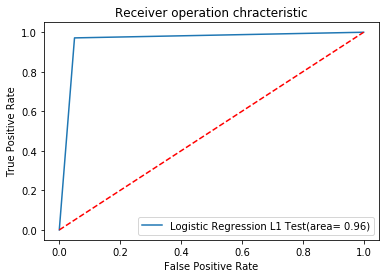

In [132]:
# Plot ROC and AUC
l1_roc_auc_test_sh = roc_auc_score(y_test_sh, y_logreg_pred_l1_test_sh)

plt.figure()
plt.plot(fpr_l1_test_sh, tpr_l1_test_sh, label="Logistic Regression L1 Test(area= %0.2f)" % l1_roc_auc_test_sh)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### F. Binary Classification Using Naive Bayes Classifiers

#### For training

In [133]:
# Naive Bayes
gnb_train_sh = GaussianNB()
gnb_train_sh.fit(x_train_df_sh, y_train_sh)
y_pred_gnb_train_sh = gnb_train_sh.predict(x_train_df_sh)

#### For test

In [134]:
# Naive Bayes
y_pred_gnb_test_sh = gnb_train_sh.predict(x_test_df_sh)

In [135]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_sh, y_pred_gnb_test_sh))

0.9066666666666666


In [136]:
# Confusion matrix
cm_gnb_test_sh = confusion_matrix(y_test_sh, y_pred_gnb_test_sh)
cm_gnb_test_sh

array([[33,  7],
       [ 0, 35]])

In [137]:
# Get values for true negative, false positive, false negative, and true positive
tn_gnb_test_sh = cm_gnb_test_sh[0][0]
fp_gnb_test_sh = cm_gnb_test_sh[0][1]
fn_gnb_test_sh = cm_gnb_test_sh[1][0]
tp_gnb_test_sh = cm_gnb_test_sh[1][1]

In [138]:
# Calculate precision
precision_gnb_test_sh = tp_gnb_test_sh/(tp_gnb_test_sh + fp_gnb_test_sh)
precision_gnb_test_sh

0.8333333333333334

In [139]:
# Calculate recall
recall_gnb_test_sh = tp_gnb_test_sh/(tp_gnb_test_sh + fn_gnb_test_sh)
recall_gnb_test_sh

1.0

In [140]:
# Calculate f1-score
f1_gnb_test_sh = 2*((precision_gnb_test_sh*recall_gnb_test_sh)/(precision_gnb_test_sh+recall_gnb_test_sh))
f1_gnb_test_sh

0.9090909090909091

In [141]:
# ROC
fpr_gnb_test_sh, tpr_gnb_test_sh, _ = roc_curve(y_test_sh, y_pred_gnb_test_sh, pos_label=1)

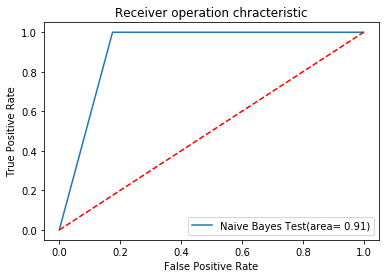

In [142]:
# Plot ROC and AUC
gnb_roc_auc_test_sh = roc_auc_score(y_test_sh, y_pred_gnb_test_sh)

plt.figure()
plt.plot(fpr_gnb_test_sh, tpr_gnb_test_sh, label="Naive Bayes Test(area= %0.2f)" % gnb_roc_auc_test_sh)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### G. Multinomial Priors

For training data

In [143]:
# Multinomial Naive Bayes
multi_train_sh = MultinomialNB()
multi_train_sh.fit(x_train_df_sh, y_train_sh)
y_multi_pred_train_sh = multi_train_sh.predict(x_train_df_sh)

For test data

In [144]:
# Multinomial Naive Bayes
multi_test_sh = MultinomialNB()
multi_test_sh.fit(x_train_df_sh, y_train_sh)
y_multi_pred_test_sh = multi_test_sh.predict(x_test_df_sh)

In [145]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_sh, y_multi_pred_test_sh))

0.9466666666666667


In [146]:
# Confusion matrix
cm_multi_test_sh = confusion_matrix(y_test_sh, y_multi_pred_test_sh)
cm_multi_test_sh

array([[37,  3],
       [ 1, 34]])

In [147]:
# Get values for true negative, false positive, false negative, and true positive
tn_multi_test_sh = cm_multi_test_sh[0][0]
fp_multi_test_sh = cm_multi_test_sh[0][1]
fn_multi_test_sh = cm_multi_test_sh[1][0]
tp_multi_test_sh = cm_multi_test_sh[1][1]

In [148]:
# Calculate precision
precision_multi_test_sh = tp_multi_test_sh/(tp_multi_test_sh + fp_multi_test_sh)
precision_multi_test_sh

0.918918918918919

In [149]:
# Calculate recall
recall_multi_test_sh = tp_multi_test_sh/(tp_multi_test_sh + fn_multi_test_sh)
recall_multi_test_sh

0.9714285714285714

In [150]:
# Calculate f1-score
f1_multi_test_sh = 2*((precision_multi_test_sh*recall_multi_test_sh)/(precision_multi_test_sh+recall_multi_test_sh))
f1_multi_test_sh

0.9444444444444445

In [151]:
# ROC
fpr_multi_test_sh, tpr_multi_test_sh, _ = roc_curve(y_test_sh, y_multi_pred_test_sh, pos_label=1)

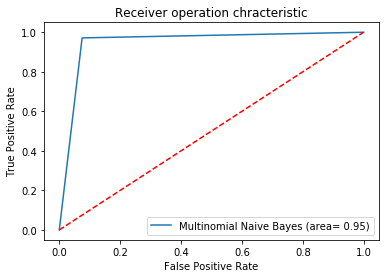

In [152]:
# Plot ROC and AUC
multi_roc_auc_test_sh = roc_auc_score(y_test_sh, y_multi_pred_test_sh)

plt.figure()
plt.plot(fpr_multi_test_sh, tpr_multi_test_sh, label="Multinomial Naive Bayes (area= %0.2f)" % multi_roc_auc_test_sh)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### LMFAO

#### A. Download the YouTube Spam Collection Data

In [153]:
# Load .data file
df_lm = pd.read_csv("../data/Youtube03-LMFAO.csv",sep=",", engine="python")

# Preview data
df_lm.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


#### B. Choose the test set and training set

In [154]:
# Training set

# Filter to get all ham
df_train_H_lm = df_lm[df_lm["CLASS"] == 0]

# Select the rest from ham
df_train_selectH_lm = df_train_H_lm.iloc[0:161]

# Filter to get all spam
df_train_S_lm = df_lm[df_lm["CLASS"] == 1]

# Select the rest from spam
df_train_selectS_lm = df_train_S_lm.iloc[0:188]

# Merge into training set
df_train_lm = pd.concat([df_train_selectH_lm, df_train_selectS_lm])
df_train_lm

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0
5,z13rcnlyamexujnf022vcrb5qouetpjz404,Brian Brai,2015-05-28T08:58:10.905000,Shuffle﻿,0
...,...,...,...,...,...
368,z13txnfjov2tgle5z04cfd4jlyflx52ysbk,tchangkou,2014-12-04T01:31:02.296000,Check out this video on YouTube:﻿,1
369,z12vevn4xzbmstvui23mi5ki2lnfu14pp04,Tan Jia Min,2014-11-29T05:53:19.584000,Check out this video on YouTube:..🌈🌈🌈﻿,1
370,z12fy55oxki3u1ryi04cjprhawawcvkzivo0k,GORHD/TV Studio,2014-11-25T16:15:50.566000,subscribers please`﻿,1
371,z12pfhgg3vrnuhme122ixxdx5zyyit5ac04,Jaymes Michie,2014-11-11T18:01:00.198000,Yo like what up this song is fricking beast an...,1


In [155]:
# Test set

# Filter to get all ham
df_test_H_lm = df_lm[df_lm["CLASS"] == 0]

# Select first 30 rows from ham
df_test_selectH_lm = df_test_H_lm.iloc[161:]

# Filter to get all spam
df_test_S_lm = df_lm[df_lm["CLASS"] == 1]

# Select first 50 rows from spam
df_test_selectS_lm = df_test_S_lm.iloc[188:]

# Merge into test set
df_test_lm = pd.concat([df_test_selectH_lm, df_test_selectS_lm])
df_test_lm

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
179,z12wyrji5vvpjp1ux23ufr0pzojkz1fwk04,dan19752008,2015-05-17T11:50:46.223000,What&#39;s with the guys jacket? 1 sleeve and ...,0
180,z13lzzd4yrzbhzaez22gfnvw1nugw5k0h,OfficialBladeDoesGaming,2015-05-17T11:03:22.388000,Best song ever﻿,0
182,z13mdf1oeo3ddhrdg23sxtdw4mzmwdbsd,adish Newar,2015-05-17T08:21:37.091000,i like this steps...﻿,0
183,z13pdz0imlendr3es23zsv5iflbewhedb,Lxflys yolo,2015-05-17T03:57:28.997000,Let get this video to one billion views﻿,0
184,z12kcfcxyvb1cxhls220s3g4jlrtuppxg04,Eli Zabeth,2015-05-17T01:14:28.368000,In my head this is like 2 years ago.. Time FLIES﻿,0
...,...,...,...,...,...
431,z12dw3tbbzm2gpzty22gtf1bvviqeha2j,ItsJoey Dash,2014-07-22T10:04:00.700000,EVERYONE PLEASE SUBSCRIBE TO MY CHANNEL OR CAN...,1
432,z13kflxgcqn3gv0hz04cdn5g4zjhutdosdw,ItsJoey Dash,2014-07-22T10:02:25.925000,EVERYONE PLEASE GO SUBSCRIBE TO MY CHANNEL OR ...,1
433,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
435,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1


#### C. Represent each comment using TF-IDF features

In [156]:
# Get list of comments for train set
comments_train_lm = df_train_lm["CONTENT"]
corpus_train_lm = comments_train_lm.tolist()

In [157]:
# TFIDF
vectorizer_train_lm = TfidfVectorizer()
x_train_lm = vectorizer_train_lm.fit_transform(corpus_train_lm)
print("Feature names: ", vectorizer_train_lm.get_feature_names())
print("X.shape: ", x_train_lm.shape)

Feature names:  ['00', '000', '10', '100', '10000000', '1000000000', '104999962146104962510', '10b35481', '11', '15', '17', '19', '1bi', '1m00s', '20', '2004', '2011', '2015', '2016', '23everydayimvaping', '23giraffebruuh', '23kinglothedancer', '23lmfao', '247', '27', '28', '2m19s', '301', '39', '3m', '3m40s', '3m57s', '40', '4m11s', '4th', '50', '500', '5000', '505b0232', '57', '5th', '666', '800', '851', '90', '90000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '920', '__', '______________________', '______________________________', 'abonner', 'about', 'act', 'actors', 'actresses', 'actually', 'adoult', 'advertisements', 'after', 'agree', 'ah', 'ahhh', 'airlines', 'all', 'already', 'a

In [158]:
x_train_df_lm = pd.DataFrame(x_train_lm.toarray())
x_train_df_lm

,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.122090,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.414828,0.0,0.0
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.414828,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.124608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [159]:
# Get list of comments for test set
comments_test_lm = df_test_lm["CONTENT"]
corpus_test_lm = comments_test_lm.tolist()

In [160]:
# TFIDF
x_test_lm = vectorizer_train_lm.transform(corpus_test_lm)
print("Feature names: ", vectorizer_train_lm.get_feature_names())
print("X.shape: ", x_test_lm.shape)

Feature names:  ['00', '000', '10', '100', '10000000', '1000000000', '104999962146104962510', '10b35481', '11', '15', '17', '19', '1bi', '1m00s', '20', '2004', '2011', '2015', '2016', '23everydayimvaping', '23giraffebruuh', '23kinglothedancer', '23lmfao', '247', '27', '28', '2m19s', '301', '39', '3m', '3m40s', '3m57s', '40', '4m11s', '4th', '50', '500', '5000', '505b0232', '57', '5th', '666', '800', '851', '90', '90000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '920', '__', '______________________', '______________________________', 'abonner', 'about', 'act', 'actors', 'actresses', 'actually', 'adoult', 'advertisements', 'after', 'agree', 'ah', 'ahhh', 'airlines', 'all', 'already', 'a

In [161]:
x_test_df_lm = pd.DataFrame(x_test_lm.toarray())
x_test_df_lm

,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.186998,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.122332,0.0,0.0,0.0,0.0,0.0,0.0


#### D. L2-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [162]:
# Define independent and dependent variables
# The independent variable is x_train_df
y_train_lm = df_train_lm["CLASS"]

In [163]:
# Set up lamda values
lambda_values_lm = []
for i in range (-5, 6):
    lambda_values_lm.append(pow(10,i))

c_lm = []
for i in lambda_values_lm:
    c_lm.append(1/i)
print("C:", c_lm)

C: [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]


In [164]:
# Set up parameters
penalty_l2_lm = ["l2"]

parameters_l2_lm = {"C": c_lm, 
              "penalty": penalty_l2_lm, 
              "solver":["liblinear"]}

logistic_lm = linear_model.LogisticRegression()

In [165]:
# Cross Validation
gridcv_l2_train_lm = GridSearchCV(logistic_lm, parameters_l2_lm, cv = 5)
best_model_l2_train_lm = gridcv_l2_train_lm.fit(x_train_df_lm, y_train_lm)
best_c_l2_train_lm = best_model_l2_train_lm.best_estimator_.get_params()["C"]
print("Best C: ", best_model_l2_train_lm.best_estimator_.get_params()["C"])

Best C:  99999.99999999999


In [166]:
# Convert back to lamda value
index_c_l2_lm = c_lm.index(99999.99999999999)
lambda_conversion_l2_lm = lambda_values_lm[index_c_l2_lm]
print("Best lambda: ", lambda_conversion_l2_lm)

Best lambda:  1e-05


#### ii. Train L-2 Penalized Logistic Regression

In [167]:
# Logistic Regression
logreg_l2_train_lm = LogisticRegression(penalty = "l2", C = best_c_l2_train_lm, solver = "liblinear")
logreg_l2_train_lm.fit(x_train_df_lm, y_train_lm)
y_logreg_pred_l2_train_lm = logreg_l2_train_lm.predict(x_train_df_lm)

#### iii. Test L-2 Penalized Logistic Regression

In [168]:
# Define independent and dependent variables
# The independent variable is x_test_df
y_test_lm = df_test_lm["CLASS"]

In [169]:
# Logistic Regression
y_logreg_pred_l2_test_lm = logreg_l2_train_lm.predict(x_test_df_lm)

In [170]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_lm, y_logreg_pred_l2_test_lm))

0.9213483146067416


In [171]:
# Confusion matrix
cm_l2_test_lm = confusion_matrix(y_test_lm, y_logreg_pred_l2_test_lm)
cm_l2_test_lm

array([[39,  2],
       [ 5, 43]])

In [172]:
# Get values for true negative, false positive, false negative, and true positive
tn_l2_test_lm = cm_l2_test_lm[0][0]
fp_l2_test_lm = cm_l2_test_lm[0][1]
fn_l2_test_lm = cm_l2_test_lm[1][0]
tp_l2_test_lm = cm_l2_test_lm[1][1]

In [173]:
# Calculate precision
precision_l2_test_lm = tp_l2_test_lm/(tp_l2_test_lm + fp_l2_test_lm)
precision_l2_test_lm

0.9555555555555556

In [174]:
# Calculate recall
recall_l2_test_lm = tp_l2_test_lm/(tp_l2_test_lm + fn_l2_test_lm)
recall_l2_test_lm

0.8958333333333334

In [175]:
# Calculate f1-score
f1_l2_test_lm = 2*((precision_l2_test_lm*recall_l2_test_lm)/(precision_l2_test_lm+recall_l2_test_lm))
f1_l2_test_lm

0.924731182795699

In [176]:
# ROC
fpr_l2_test_lm, tpr_l2_test_lm, _ = roc_curve(y_test_lm, y_logreg_pred_l2_test_lm, pos_label=1)

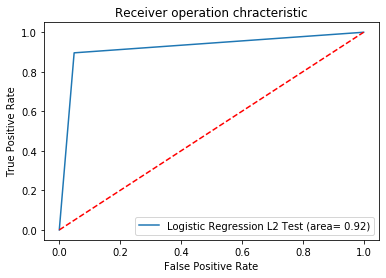

In [177]:
# Plot ROC and AUC
l2_roc_auc_test_lm = roc_auc_score(y_test_lm, y_logreg_pred_l2_test_lm)

plt.figure()
plt.plot(fpr_l2_test_lm, tpr_l2_test_lm, label="Logistic Regression L2 Test (area= %0.2f)" % l2_roc_auc_test_lm)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### E. L1-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [178]:
# Set up parameters
logistic_l1_lm = linear_model.LogisticRegression()
penalty_l1_lm = ["l1"]
parameters_l1_lm = {"C": c_lm, 
              "penalty": penalty_l1_lm, 
              "solver":["liblinear"]}

In [179]:
# Cross Validation
gridcv_l1_train_lm = GridSearchCV(logistic_l1_lm, parameters_l1_lm, cv = 5)
best_model_l1_train_lm = gridcv_l1_train_lm.fit(x_train_df_lm, y_train_lm)
best_c_l1_train_lm = best_model_l1_train_lm.best_estimator_.get_params()["C"]
print("Best C: ", best_c_l1_train_lm)

Best C:  99999.99999999999


In [180]:
# Convert back to lamda value
index_c_l1_lm = c_lm.index(10000.0)
lambda_conversion_l1_lm = lambda_values_lm[index_c_l1_lm]
print("Best lambda: ", lambda_conversion_l1_lm)

Best lambda:  0.0001


#### ii. Train L-1 Penalized Logistic Regression

In [181]:
# Logistic Regression
logreg_l1_train_lm = LogisticRegression(penalty = "l1", C = best_c_l1_train_lm, solver = "liblinear")
logreg_l1_train_lm.fit(x_train_df_lm, y_train_lm)
y_logreg_pred_l1_train_lm = logreg_l1_train_lm.predict(x_train_df_lm)

#### iii. Test L-1 Penalized Logistic Regression

In [182]:
# Define independent and dependent variables
# The independent variable is x_test_df_sh
# The dependent variable is y_test_sh

In [183]:
# Logistic Regression
y_logreg_pred_l1_test_lm = logreg_l1_train_lm.predict(x_test_df_lm)

In [184]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_lm, y_logreg_pred_l1_test_lm))

0.9325842696629213


In [185]:
# Confusion matrix
cm_l1_test_lm = confusion_matrix(y_test_lm, y_logreg_pred_l1_test_lm)
cm_l1_test_lm

array([[40,  1],
       [ 5, 43]])

In [186]:
# Get values for true negative, false positive, false negative, and true positive
tn_l1_test_lm = cm_l1_test_lm[0][0]
fp_l1_test_lm = cm_l1_test_lm[0][1]
fn_l1_test_lm = cm_l1_test_lm[1][0]
tp_l1_test_lm = cm_l1_test_lm[1][1]

In [187]:
# Calculate precision
precision_l1_test_lm = tp_l1_test_lm/(tp_l1_test_lm + fp_l1_test_lm)
precision_l1_test_lm

0.9772727272727273

In [188]:
# Calculate recall
recall_l1_test_lm = tp_l1_test_lm/(tp_l1_test_lm + fn_l1_test_lm)
recall_l1_test_lm

0.8958333333333334

In [189]:
# Calculate f1-score
f1_l1_test_lm = 2*((precision_l1_test_lm*recall_l1_test_lm)/(precision_l1_test_lm+recall_l1_test_lm))
f1_l1_test_lm

0.9347826086956522

In [190]:
# ROC
fpr_l1_test_lm, tpr_l1_test_lm, _ = roc_curve(y_test_lm, y_logreg_pred_l1_test_lm, pos_label=1)

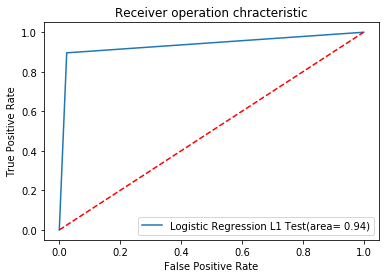

In [191]:
# Plot ROC and AUC
l1_roc_auc_test_lm = roc_auc_score(y_test_lm, y_logreg_pred_l1_test_lm)

plt.figure()
plt.plot(fpr_l1_test_lm, tpr_l1_test_lm, label="Logistic Regression L1 Test(area= %0.2f)" % l1_roc_auc_test_lm)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### F. Binary Classification Using Naive Bayes Classifiers

#### For training

In [192]:
# Naive Bayes
gnb_train_lm = GaussianNB()
gnb_train_lm.fit(x_train_df_lm, y_train_lm)
y_pred_gnb_train_lm = gnb_train_lm.predict(x_train_df_lm)

#### For test

In [193]:
# Naive Bayes
y_pred_gnb_test_lm = gnb_train_lm.predict(x_test_df_lm)

In [194]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_lm, y_pred_gnb_test_lm))

0.898876404494382


In [195]:
# Confusion matrix
cm_gnb_test_lm = confusion_matrix(y_test_lm, y_pred_gnb_test_lm)
cm_gnb_test_lm

array([[39,  2],
       [ 7, 41]])

In [196]:
# Get values for true negative, false positive, false negative, and true positive
tn_gnb_test_lm = cm_gnb_test_lm[0][0]
fp_gnb_test_lm = cm_gnb_test_lm[0][1]
fn_gnb_test_lm = cm_gnb_test_lm[1][0]
tp_gnb_test_lm = cm_gnb_test_lm[1][1]

In [197]:
# Calculate precision
precision_gnb_test_lm = tp_gnb_test_lm/(tp_gnb_test_lm + fp_gnb_test_lm)
precision_gnb_test_lm

0.9534883720930233

In [198]:
# Calculate recall
recall_gnb_test_lm = tp_gnb_test_lm/(tp_gnb_test_lm + fn_gnb_test_lm)
recall_gnb_test_lm

0.8541666666666666

In [199]:
# Calculate f1-score
f1_gnb_test_lm = 2*((precision_gnb_test_lm*recall_gnb_test_lm)/(precision_gnb_test_lm+recall_gnb_test_lm))
f1_gnb_test_lm

0.9010989010989011

In [200]:
# ROC
fpr_gnb_test_lm, tpr_gnb_test_lm, _ = roc_curve(y_test_lm, y_pred_gnb_test_lm, pos_label=1)

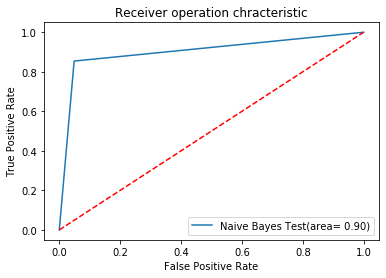

In [201]:
# Plot ROC and AUC
gnb_roc_auc_test_lm = roc_auc_score(y_test_lm, y_pred_gnb_test_lm)

plt.figure()
plt.plot(fpr_gnb_test_lm, tpr_gnb_test_lm, label="Naive Bayes Test(area= %0.2f)" % gnb_roc_auc_test_lm)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### G. Multinomial Priors

For training data

In [202]:
# Multinomial Naive Bayes
multi_train_lm = MultinomialNB()
multi_train_lm.fit(x_train_df_lm, y_train_lm)
y_multi_pred_train_lm = multi_train_lm.predict(x_train_df_lm)

For test data

In [203]:
# Multinomial Naive Bayes
multi_test_lm = MultinomialNB()
multi_test_lm.fit(x_train_df_lm, y_train_lm)
y_multi_pred_test_lm = multi_test_lm.predict(x_test_df_lm)

In [204]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_lm, y_multi_pred_test_lm))

0.8764044943820225


In [205]:
# Confusion matrix
cm_multi_test_lm = confusion_matrix(y_test_lm, y_multi_pred_test_lm)
cm_multi_test_lm

array([[33,  8],
       [ 3, 45]])

In [206]:
# Get values for true negative, false positive, false negative, and true positive
tn_multi_test_lm = cm_multi_test_lm[0][0]
fp_multi_test_lm = cm_multi_test_lm[0][1]
fn_multi_test_lm = cm_multi_test_lm[1][0]
tp_multi_test_lm = cm_multi_test_lm[1][1]

In [207]:
# Calculate precision
precision_multi_test_lm = tp_multi_test_lm/(tp_multi_test_lm + fp_multi_test_lm)
precision_multi_test_lm

0.8490566037735849

In [208]:
# Calculate recall
recall_multi_test_lm = tp_multi_test_lm/(tp_multi_test_lm + fn_multi_test_lm)
recall_multi_test_lm

0.9375

In [209]:
# Calculate f1-score
f1_multi_test_lm = 2*((precision_multi_test_lm*recall_multi_test_lm)/(precision_multi_test_lm+recall_multi_test_lm))
f1_multi_test_lm

0.8910891089108911

In [210]:
# ROC
fpr_multi_test_lm, tpr_multi_test_lm, _ = roc_curve(y_test_lm, y_multi_pred_test_lm, pos_label=1)

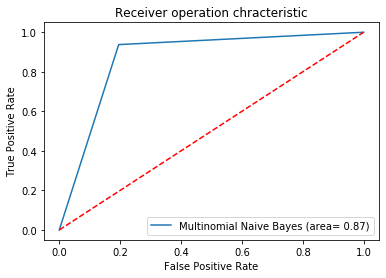

In [211]:
# Plot ROC and AUC
multi_roc_auc_test_lm = roc_auc_score(y_test_lm, y_multi_pred_test_lm)

plt.figure()
plt.plot(fpr_multi_test_lm, tpr_multi_test_lm, label="Multinomial Naive Bayes (area= %0.2f)" % multi_roc_auc_test_lm)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### Katy Perry

#### A. Download the YouTube Spam Collection Data

In [212]:
# Load .data file
df_kp = pd.read_csv("../data/Youtube02-KatyPerry.csv",sep=",", engine="python")

# Preview data
df_kp.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


#### B. Choose the test set and training set

In [213]:
# Training set

# Filter to get all ham
df_train_H_kp = df_kp[df_kp["CLASS"] == 0]

# Select the rest from ham
df_train_selectH_kp = df_train_H_kp.iloc[0:140]

# Filter to get all spam
df_train_S_kp = df_kp[df_kp["CLASS"] == 1]

# Select the rest from spam
df_train_selectS_kp = df_train_S_kp.iloc[0:140]

# Merge into training set
df_train_kp = pd.concat([df_train_selectH_kp, df_train_selectS_kp])
df_train_kp

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
35,z121tz2zhzjgercem23yttsqvnuijljql04,Daniel Korp,2014-08-24T17:17:17,"katy perry does remind me of a tiger,like as i...",0
36,z13hyv0ixuavuliyt04cix1j5t3qgpggce4,Paul Hannam,2014-08-25T05:37:22,In what South American jungle or any jungle fo...,0
39,z13cyh3gowyyxlotr23vsplhbt23hbmwy04,Angie Sivrikozi,2014-08-27T21:12:48,"Its a good song and i like her video clip, bec...",0
42,z13cwrzyolf1zh4v023ctteams25hldf5,Zain Hassan,2014-08-29T19:00:20,Thanks to this video we know that Nokia phones...,0
46,z135drnwswvsgvkyq04cfjh4xpb3cn2hugg,Sam Klein,2014-08-31T03:52:29,"She named the tiger Kitty Purry No, seriously...",0
...,...,...,...,...,...
267,z12izheoltagv1vvg233cvfgpt3yxdhed,NeverGreen35,2014-10-28T20:04:45,Subscribe me and i subscribe you back!!﻿,1
272,z12jwlxzxsa3srdwf04cftvx1rfjj1vrxms0k,themind blasters,2014-10-29T19:39:38,plz subscribe to my channel i need subs and if...,1
273,z12qxxchsv2oetuut22jwxur3tjjcvmw004,D Germain,2014-10-29T21:34:30,please look up DHG SONGS this is my playlist w...,1
274,z13chb0r5lndj1mz504cefmpetrryb3qvf0,Nerdy Peach,2014-10-29T22:44:41,Hey! I'm NERDY PEACH and I'm a new youtuber an...,1


In [214]:
# Test set

# Filter to get all ham
df_test_H_kp = df_kp[df_kp["CLASS"] == 0]

# Select first 30 rows from ham
df_test_selectH_kp = df_test_H_kp.iloc[140:]

# Filter to get all spam
df_test_S_kp = df_kp[df_kp["CLASS"] == 1]

# Select first 50 rows from spam
df_test_selectS_kp = df_test_S_kp.iloc[140:]

# Merge into test set
df_test_kp = pd.concat([df_test_selectH_kp, df_test_selectS_kp])
df_test_kp

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
292,z12gjxa44vzxcfuqz04cjjmphmiyhzopcuk0k,ELPaso1990TX,2014-11-05T17:37:25,I'd rather hear some propa explicit gangsta ra...,0
293,z13uhfapiubszxn3g23jctqqpvaectjss,m450nH,2014-11-05T18:30:45,"DAMNNNNNNNN, she is sexy O_O﻿",0
295,z122ghagzyvyzrv3b23fzf4pelvusdoub,a carlton,2014-11-06T00:55:49,I LOVE YOU!!! Because u make me smile when im ...,0
296,z122g12wzuztdjac4232jxuomqylcfjhc04,William Carey,2014-11-06T02:47:23,"This song is the most boring, asinine song I h...",0
297,z13qh3azhtvkvbypn04cflwaxoz5x51bip00k,Googles top ten pics,2014-11-06T05:26:28,Katy Perry - Roar (Official): http://youtu.be/...,0
...,...,...,...,...,...
338,z12mznwahnvyz3mjm04cfnizwzmijtjhsp40k,Those two boys,2015-06-05T03:15:10,Please subscribe to us and thank you﻿,1
339,z13ihroixyvmzvl2h22kclthlnmmxtggl04,Destiny Cable,2015-06-05T03:33:16,PLEASE VOTE FOR ME FOR THE WET SEAL MODEL 2015...,1
340,z13tz53yppyvd3obo04cef4zzounf1cporg0k,Portman P.,2015-06-05T10:04:47,"SIMPLY PUT, OUR CUSTOMERS LOVE US... and so wi...",1
341,z12wgp0z4oj1sxqqf04cgfuwczfsvnjw3ew,sunny leone,2015-06-05T15:11:28,https://binbox.io/DNCkM#qT4Q1JB1﻿,1


#### C. Represent each comment using TF-IDF features

In [215]:
# Get list of comments for train set
comments_train_kp = df_train_kp["CONTENT"]
corpus_train_kp = comments_train_kp.tolist()

In [216]:
# TFIDF
vectorizer_train_kp = TfidfVectorizer()
x_train_kp = vectorizer_train_kp.fit_transform(corpus_train_kp)
print("Feature names: ", vectorizer_train_kp.get_feature_names())
print("X.shape: ", x_train_kp.shape)

Feature names:  ['00', '000', '002', '018', '053012', '0cb8qfjaa', '0d878a889c', '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks', '0laviqu2b', '10', '100', '1000', '100007085325116', '10001', '10626048', '10626835', '106865403', '107297364', '1073741830', '1073741943', '111719098841907', '111982027348137311818', '11th', '13', '131275322914', '14', '1408122684', '1442646731', '1461302180794905', '15', '17', '1727483389', '19255', '1fhenqx1twqm153v2ptayiejnealahzvem', '1min', '20', '2012430', '2014', '2177367', '229508', '25', '25000', '251638183951', '25874', '25th', '2f', '2fen', '2flist_of_most_viewed_youtube_videos', '2fwiki', '2nd', '2parale', '2tggp3pv6l', '30', '302703146601369', '30th', '327568907427561', '333607726823679', '333608120156973', '342', '3873', '389088', '39', '3a', '3bie', '3bkeywords', '3bqid', '3bsr', '4483179854075', '46', '4s', '500m', '5094', '53331', '5337555197', '53481', '543627485763966', '5575096797', '5bgkg2iwphzohwaeuesrwnegqg_labco7

In [217]:
x_train_df_kp = pd.DataFrame(x_train_kp.toarray())
x_train_df_kp

,0,1,2,3,4,5,6,7,8,9,...,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.254039,0.0,0.0,0.0


In [218]:
# Get list of comments for test set
comments_test_kp = df_test_kp["CONTENT"]
corpus_test_kp = comments_test_kp.tolist()

In [219]:
# TFIDF
x_test_kp = vectorizer_train_kp.transform(corpus_test_kp)
print("Feature names: ", vectorizer_train_kp.get_feature_names())
print("X.shape: ", x_test_kp.shape)

Feature names:  ['00', '000', '002', '018', '053012', '0cb8qfjaa', '0d878a889c', '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks', '0laviqu2b', '10', '100', '1000', '100007085325116', '10001', '10626048', '10626835', '106865403', '107297364', '1073741830', '1073741943', '111719098841907', '111982027348137311818', '11th', '13', '131275322914', '14', '1408122684', '1442646731', '1461302180794905', '15', '17', '1727483389', '19255', '1fhenqx1twqm153v2ptayiejnealahzvem', '1min', '20', '2012430', '2014', '2177367', '229508', '25', '25000', '251638183951', '25874', '25th', '2f', '2fen', '2flist_of_most_viewed_youtube_videos', '2fwiki', '2nd', '2parale', '2tggp3pv6l', '30', '302703146601369', '30th', '327568907427561', '333607726823679', '333608120156973', '342', '3873', '389088', '39', '3a', '3bie', '3bkeywords', '3bqid', '3bsr', '4483179854075', '46', '4s', '500m', '5094', '53331', '5337555197', '53481', '543627485763966', '5575096797', '5bgkg2iwphzohwaeuesrwnegqg_labco7

In [220]:
x_test_df_kp = pd.DataFrame(x_test_kp.toarray())
x_test_df_kp

,0,1,2,3,4,5,6,7,8,9,...,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.225169,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.127241,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.351679,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


#### D. L2-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [221]:
# Define independent and dependent variables
# The independent variable is x_train_df
y_train_kp = df_train_kp["CLASS"]

In [222]:
# Set up lamda values
lambda_values_kp = []
for i in range (-5, 6):
    lambda_values_kp.append(pow(10,i))

c_kp = []
for i in lambda_values_kp:
    c_kp.append(1/i)
print("C:", c_kp)

C: [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]


In [223]:
# Set up parameters
penalty_l2_kp = ["l2"]

parameters_l2_kp = {"C": c_kp, 
              "penalty": penalty_l2_kp, 
              "solver":["liblinear"]}

logistic_kp = linear_model.LogisticRegression()

In [224]:
# Cross Validation
gridcv_l2_train_kp = GridSearchCV(logistic_kp, parameters_l2_kp, cv = 5)
best_model_l2_train_kp = gridcv_l2_train_kp.fit(x_train_df_kp, y_train_kp)
best_c_l2_train_kp = best_model_l2_train_kp.best_estimator_.get_params()["C"]
print("Best C: ", best_model_l2_train_kp.best_estimator_.get_params()["C"])

Best C:  99999.99999999999


In [225]:
# Convert back to lamda value
index_c_l2_kp = c_kp.index(99999.99999999999)
lambda_conversion_l2_kp = lambda_values_kp[index_c_l2_kp]
print("Best lambda: ", lambda_conversion_l2_kp)

Best lambda:  1e-05


#### ii. Train L-2 Penalized Logistic Regression

In [226]:
# Logistic Regression
logreg_l2_train_kp = LogisticRegression(penalty = "l2", C = best_c_l2_train_kp, solver = "liblinear")
logreg_l2_train_kp.fit(x_train_df_kp, y_train_kp)
y_logreg_pred_l2_train_kp = logreg_l2_train_kp.predict(x_train_df_kp)

#### iii. Test L-2 Penalized Logistic Regression

In [227]:
# Define independent and dependent variables
# The independent variable is x_test_df
y_test_kp = df_test_kp["CLASS"]

In [228]:
# Logistic Regression
y_logreg_pred_l2_test_kp = logreg_l2_train_kp.predict(x_test_df_kp)

In [229]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_kp, y_logreg_pred_l2_test_kp))

0.9285714285714286


In [230]:
# Confusion matrix
cm_l2_test_kp = confusion_matrix(y_test_kp, y_logreg_pred_l2_test_kp)
cm_l2_test_kp

array([[33,  2],
       [ 3, 32]])

In [231]:
# Get values for true negative, false positive, false negative, and true positive
tn_l2_test_kp = cm_l2_test_kp[0][0]
fp_l2_test_kp = cm_l2_test_kp[0][1]
fn_l2_test_kp = cm_l2_test_kp[1][0]
tp_l2_test_kp = cm_l2_test_kp[1][1]

In [232]:
# Calculate precision
precision_l2_test_kp = tp_l2_test_kp/(tp_l2_test_kp + fp_l2_test_kp)
precision_l2_test_kp

0.9411764705882353

In [233]:
# Calculate recall
recall_l2_test_kp = tp_l2_test_kp/(tp_l2_test_kp + fn_l2_test_kp)
recall_l2_test_kp

0.9142857142857143

In [234]:
# Calculate f1-score
f1_l2_test_kp = 2*((precision_l2_test_kp*recall_l2_test_kp)/(precision_l2_test_kp+recall_l2_test_kp))
f1_l2_test_kp

0.9275362318840579

In [235]:
# ROC
fpr_l2_test_kp, tpr_l2_test_kp, _ = roc_curve(y_test_kp, y_logreg_pred_l2_test_kp, pos_label=1)

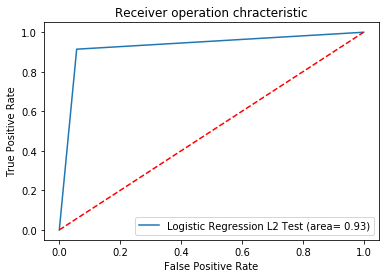

In [236]:
# Plot ROC and AUC
l2_roc_auc_test_kp = roc_auc_score(y_test_kp, y_logreg_pred_l2_test_kp)

plt.figure()
plt.plot(fpr_l2_test_kp, tpr_l2_test_kp, label="Logistic Regression L2 Test (area= %0.2f)" % l2_roc_auc_test_kp)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### E. L1-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [237]:
# Set up parameters
logistic_l1_kp = linear_model.LogisticRegression()
penalty_l1_kp = ["l1"]
parameters_l1_kp = {"C": c_kp, 
              "penalty": penalty_l1_kp, 
              "solver":["liblinear"]}

In [238]:
# Cross Validation
gridcv_l1_train_kp = GridSearchCV(logistic_l1_kp, parameters_l1_kp, cv = 5)
best_model_l1_train_kp = gridcv_l1_train_kp.fit(x_train_df_kp, y_train_kp)
best_c_l1_train_kp = best_model_l1_train_kp.best_estimator_.get_params()["C"]
print("Best C: ", best_c_l1_train_kp)

Best C:  10000.0


In [239]:
# Convert back to lamda value
index_c_l1_kp = c_kp.index(10000.0)
lambda_conversion_l1_kp = lambda_values_kp[index_c_l1_kp]
print("Best lambda: ", lambda_conversion_l1_kp)

Best lambda:  0.0001


#### ii. Train L-1 Penalized Logistic Regression

In [240]:
# Logistic Regression
logreg_l1_train_kp = LogisticRegression(penalty = "l1", C = best_c_l1_train_kp, solver = "liblinear")
logreg_l1_train_kp.fit(x_train_df_kp, y_train_kp)
y_logreg_pred_l1_train_kp = logreg_l1_train_kp.predict(x_train_df_kp)

#### iii. Test L-1 Penalized Logistic Regression

In [241]:
# Define independent and dependent variables
# The independent variable is x_test_df_sh
# The dependent variable is y_test_sh

In [242]:
# Logistic Regression
y_logreg_pred_l1_test_kp = logreg_l1_train_kp.predict(x_test_df_kp)

In [243]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_kp, y_logreg_pred_l1_test_kp))

0.9571428571428572


In [244]:
# Confusion matrix
cm_l1_test_kp = confusion_matrix(y_test_kp, y_logreg_pred_l1_test_kp)
cm_l1_test_kp

array([[34,  1],
       [ 2, 33]])

In [245]:
# Get values for true negative, false positive, false negative, and true positive
tn_l1_test_kp = cm_l1_test_kp[0][0]
fp_l1_test_kp = cm_l1_test_kp[0][1]
fn_l1_test_kp = cm_l1_test_kp[1][0]
tp_l1_test_kp = cm_l1_test_kp[1][1]

In [246]:
# Calculate precision
precision_l1_test_kp = tp_l1_test_kp/(tp_l1_test_kp + fp_l1_test_kp)
precision_l1_test_kp

0.9705882352941176

In [247]:
# Calculate recall
recall_l1_test_kp = tp_l1_test_kp/(tp_l1_test_kp + fn_l1_test_kp)
recall_l1_test_kp

0.9428571428571428

In [248]:
# Calculate f1-score
f1_l1_test_kp = 2*((precision_l1_test_kp*recall_l1_test_kp)/(precision_l1_test_kp+recall_l1_test_kp))
f1_l1_test_kp

0.9565217391304348

In [249]:
# ROC
fpr_l1_test_kp, tpr_l1_test_kp, _ = roc_curve(y_test_kp, y_logreg_pred_l1_test_kp, pos_label=1)

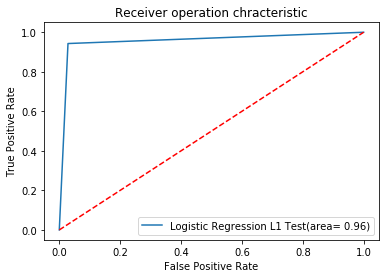

In [250]:
# Plot ROC and AUC
l1_roc_auc_test_kp = roc_auc_score(y_test_kp, y_logreg_pred_l1_test_kp)

plt.figure()
plt.plot(fpr_l1_test_kp, tpr_l1_test_kp, label="Logistic Regression L1 Test(area= %0.2f)" % l1_roc_auc_test_kp)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### F. Binary Classification Using Naive Bayes Classifiers

#### For training

In [251]:
# Naive Bayes
gnb_train_kp = GaussianNB()
gnb_train_kp.fit(x_train_df_kp, y_train_kp)
y_pred_gnb_train_kp = gnb_train_kp.predict(x_train_df_kp)

#### For test

In [252]:
# Naive Bayes
y_pred_gnb_test_kp = gnb_train_kp.predict(x_test_df_kp)

In [253]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_kp, y_pred_gnb_test_kp))

0.8571428571428571


In [254]:
# Confusion matrix
cm_gnb_test_kp = confusion_matrix(y_test_kp, y_pred_gnb_test_kp)
cm_gnb_test_kp

array([[28,  7],
       [ 3, 32]])

In [255]:
# Get values for true negative, false positive, false negative, and true positive
tn_gnb_test_kp = cm_gnb_test_kp[0][0]
fp_gnb_test_kp = cm_gnb_test_kp[0][1]
fn_gnb_test_kp = cm_gnb_test_kp[1][0]
tp_gnb_test_kp = cm_gnb_test_kp[1][1]

In [256]:
# Calculate precision
precision_gnb_test_kp = tp_gnb_test_kp/(tp_gnb_test_kp + fp_gnb_test_kp)
precision_gnb_test_kp

0.8205128205128205

In [257]:
# Calculate recall
recall_gnb_test_kp = tp_gnb_test_kp/(tp_gnb_test_kp + fn_gnb_test_kp)
recall_gnb_test_kp

0.9142857142857143

In [258]:
# Calculate f1-score
f1_gnb_test_kp = 2*((precision_gnb_test_kp*recall_gnb_test_kp)/(precision_gnb_test_kp+recall_gnb_test_kp))
f1_gnb_test_kp

0.8648648648648648

In [259]:
# ROC
fpr_gnb_test_kp, tpr_gnb_test_kp, _ = roc_curve(y_test_kp, y_pred_gnb_test_kp, pos_label=1)

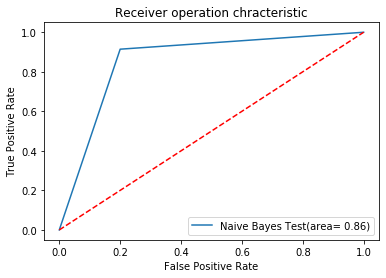

In [260]:
# Plot ROC and AUC
gnb_roc_auc_test_kp = roc_auc_score(y_test_kp, y_pred_gnb_test_kp)

plt.figure()
plt.plot(fpr_gnb_test_kp, tpr_gnb_test_kp, label="Naive Bayes Test(area= %0.2f)" % gnb_roc_auc_test_kp)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### G. Multinomial Priors

For training data

In [261]:
# Multinomial Naive Bayes
multi_train_kp = MultinomialNB()
multi_train_kp.fit(x_train_df_kp, y_train_kp)
y_multi_pred_train_kp = multi_train_kp.predict(x_train_df_kp)

For test data

In [262]:
# Multinomial Naive Bayes
multi_test_kp = MultinomialNB()
multi_test_kp.fit(x_train_df_kp, y_train_kp)
y_multi_pred_test_kp = multi_test_kp.predict(x_test_df_kp)

In [263]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_kp, y_multi_pred_test_kp))

0.9142857142857143


In [264]:
# Confusion matrix
cm_multi_test_kp = confusion_matrix(y_test_kp, y_multi_pred_test_kp)
cm_multi_test_kp

array([[33,  2],
       [ 4, 31]])

In [265]:
# Get values for true negative, false positive, false negative, and true positive
tn_multi_test_kp = cm_multi_test_kp[0][0]
fp_multi_test_kp = cm_multi_test_kp[0][1]
fn_multi_test_kp = cm_multi_test_kp[1][0]
tp_multi_test_kp = cm_multi_test_kp[1][1]

In [266]:
# Calculate precision
precision_multi_test_kp = tp_multi_test_kp/(tp_multi_test_kp + fp_multi_test_kp)
precision_multi_test_kp

0.9393939393939394

In [267]:
# Calculate recall
recall_multi_test_kp = tp_multi_test_kp/(tp_multi_test_kp + fn_multi_test_kp)
recall_multi_test_kp

0.8857142857142857

In [268]:
# Calculate f1-score
f1_multi_test_kp = 2*((precision_multi_test_kp*recall_multi_test_kp)/(precision_multi_test_kp+recall_multi_test_kp))
f1_multi_test_kp

0.9117647058823529

In [269]:
# ROC
fpr_multi_test_kp, tpr_multi_test_kp, _ = roc_curve(y_test_kp, y_multi_pred_test_kp, pos_label=1)

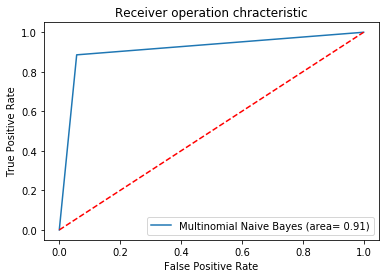

In [270]:
# Plot ROC and AUC
multi_roc_auc_test_kp = roc_auc_score(y_test_kp, y_multi_pred_test_kp)

plt.figure()
plt.plot(fpr_multi_test_kp, tpr_multi_test_kp, label="Multinomial Naive Bayes (area= %0.2f)" % multi_roc_auc_test_kp)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### Psy

#### A. Download the YouTube Spam Collection Data

In [271]:
# Load .data file
df_psy = pd.read_csv("../data/Youtube01-Psy.csv",sep=",", engine="python")

# Preview data
df_psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


#### B. Choose the test set and training set

In [272]:
# Training set

# Filter to get all ham
df_train_H_psy = df_psy[df_psy["CLASS"] == 0]

# Select the rest from ham
df_train_selectH_psy = df_train_H_psy.iloc[0:140]

# Filter to get all spam
df_train_S_psy = df_psy[df_psy["CLASS"] == 1]

# Select the rest from spam
df_train_selectS_psy = df_train_S_psy.iloc[0:140]

# Merge into training set
df_train_psy = pd.concat([df_train_selectH_psy, df_train_selectS_psy])
df_train_psy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0
16,z13bgdvyluihfv11i22rgxwhuvabzz1os04,Zielimeek21,2013-11-28T21:49:00,I'm only checking the views﻿,0
20,z12axnji5w2axxht522thb3bktvqjdlbp04,zhichao wang,2013-11-29T02:13:56,i think about 100 millions of the views come f...,0
23,z12ntlcqht2bvjewi04cf1up0xjvs5lq3mc0k,Owen Lai,2013-12-01T04:51:52,just checking the views﻿,0
28,z13tj514otzlurfbc04ccjwhrnmej1iihqw0k,Brandon Pryor,2014-01-19T00:36:25,I dont even watch it anymore i just come here ...,0
...,...,...,...,...,...
261,z13shj4wpmflidcxc04ce5f4vlqdyzjowso0k,Tornike Noniashvili,2014-11-08T04:08:09,subscribe my chanel﻿,1
268,z12vzdda5z3jvliop04cc535ayybt3mwthc,CustomerService GM,2014-11-08T05:52:30,https://www.facebook.com/pages/Mathster-WP/149...,1
273,z13fib54ilj0ix3ln23cy5h41xi0hduex,The O'dowd Crowd,2014-11-08T06:53:38,Come and watch my video it is called the odowd...,1
277,z12th3fqdqq5yn0tq23rzboi3wb4tft0y,Markus Mairhofer,2014-11-08T08:49:47,"Hey, join me on tsū, a publishing platform whe...",1


In [273]:
# Test set

# Filter to get all ham
df_test_H_psy = df_psy[df_psy["CLASS"] == 0]

# Select first 30 rows from ham
df_test_selectH_psy = df_test_H_psy.iloc[140:]

# Filter to get all spam
df_test_S_psy = df_psy[df_psy["CLASS"] == 1]

# Select first 50 rows from spam
df_test_selectS_psy = df_test_S_psy.iloc[140:]

# Merge into test set
df_test_psy = pd.concat([df_test_selectH_psy, df_test_selectS_psy])
df_test_psy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
279,z13ytrypzmmxwrqsw22hfhf4ivbot5w2q,Hollz C,2014-11-08T09:17:52,I'm watching this in 2014﻿,0
280,z12ivx14lye5szr4k04cddnhuujytfhz4v00k,The Silhouette,2014-11-08T09:25:51,Most viewed video on youtube...daaaaaaaaaaannn...,0
281,z124elbgazqmuhvs5230ut14uta5irenh,Agarra Mela,2014-11-08T09:32:14,"how does this video have 2,127,322,484 views i...",0
282,z12dcrdpiky1w3oia04chrvgxpmuzjv4gcw,Tedi Foto,2014-11-08T09:33:30,What my gangnam style﻿,0
283,z12qxl3xupmjsbzzg04cfzegyw3xfjjjpfc,StarBlade34 OverLord,2014-11-08T09:34:57,Lol this youtuber (officialpsy) is getting so ...,0
...,...,...,...,...,...
339,z12vvnza4rq5tvzou04cgxeookraexq5opo0k,Ghazi Rizvi,2014-11-13T23:02:09,http://www.bing.com/explore/rewards?PUBL=REFER...,1
340,z12exzcrvpeew1yxg04cd5tbwnmfubnh4kk0k,Anthony1SV,2014-11-14T00:01:37,Please do buy these new Christmas shirts! You ...,1
341,z13qyxk5tzq1e5asx22xjt3wdq3ns32f5,Ameenk Chanel,2014-11-14T11:50:02,Free my apps get 1m crdits ! Just click on the...,1
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1


#### C. Represent each comment using TF-IDF features

In [274]:
# Get list of comments for train set
comments_train_psy = df_train_psy["CONTENT"]
corpus_train_psy = comments_train_psy.tolist()

In [275]:
# TFIDF
vectorizer_train_psy = TfidfVectorizer()
x_train_psy = vectorizer_train_psy.fit_transform(corpus_train_psy)
print("Feature names: ", vectorizer_train_psy.get_feature_names())
print("X.shape: ", x_train_psy.shape)

Feature names:  ['000', '02', '034', '05', '08', '10', '100', '100000415527985', '10200253113705769', '11', '1111', '112720997191206369631', '12', '123', '124', '124923004', '126', '127', '13017194', '131338190916', '134470083389909', '1415297812', '1495323920744243', '171183229277', '19924', '1firo', '2009', '2012', '2012bitches', '2013', '2014', '201470069872822', '2015', '2017', '210', '23', '24', '24398', '279', '29', '2b', '2billion', '2x10', '3000', '313327', '315', '33', '33gxrf', '39', '40beuutvu2zkxk4utgpz8k', '4604617', '492', '4shared', '50', '521', '5277478', '5287', '5800', '5million', '5s', '616375350', '636', '6381501', '694', '700', '750', '783', '79', '821', '884', '898', '8bit', '9107', '9277547', '950', '969', '9bzkp7q19f0', '__killuminati94', '_chris_cz', '_trksid', 'aaaaaaa', 'able', 'about', 'above', 'absolutely', 'access', 'accessories', 'account', 'accounts', 'acn2g', 'active', 'actor', 'actually', 'add', 'adding', 'admit', 'advice', 'affiliateid', 'after', 'aga

In [276]:
x_train_df_psy = pd.DataFrame(x_train_psy.toarray())
x_train_df_psy

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.315713,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.322748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
# Get list of comments for test set
comments_test_psy = df_test_psy["CONTENT"]
corpus_test_psy = comments_test_psy.tolist()

In [278]:
# TFIDF
x_test_psy = vectorizer_train_psy.transform(corpus_test_psy)
print("Feature names: ", vectorizer_train_psy.get_feature_names())
print("X.shape: ", x_test_psy.shape)

Feature names:  ['000', '02', '034', '05', '08', '10', '100', '100000415527985', '10200253113705769', '11', '1111', '112720997191206369631', '12', '123', '124', '124923004', '126', '127', '13017194', '131338190916', '134470083389909', '1415297812', '1495323920744243', '171183229277', '19924', '1firo', '2009', '2012', '2012bitches', '2013', '2014', '201470069872822', '2015', '2017', '210', '23', '24', '24398', '279', '29', '2b', '2billion', '2x10', '3000', '313327', '315', '33', '33gxrf', '39', '40beuutvu2zkxk4utgpz8k', '4604617', '492', '4shared', '50', '521', '5277478', '5287', '5800', '5million', '5s', '616375350', '636', '6381501', '694', '700', '750', '783', '79', '821', '884', '898', '8bit', '9107', '9277547', '950', '969', '9bzkp7q19f0', '__killuminati94', '_chris_cz', '_trksid', 'aaaaaaa', 'able', 'about', 'above', 'absolutely', 'access', 'accessories', 'account', 'accounts', 'acn2g', 'active', 'actor', 'actually', 'add', 'adding', 'admit', 'advice', 'affiliateid', 'after', 'aga

In [279]:
x_test_df_psy = pd.DataFrame(x_test_psy.toarray())
x_test_df_psy

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.41025,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### D. L2-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [280]:
# Define independent and dependent variables
# The independent variable is x_train_df
y_train_psy = df_train_psy["CLASS"]

In [281]:
# Set up lamda values
lambda_values_psy = []
for i in range (-5, 6):
    lambda_values_psy.append(pow(10,i))

c_psy = []
for i in lambda_values_psy:
    c_psy.append(1/i)
print("C:", c_psy)

C: [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]


In [282]:
# Set up parameters
penalty_l2_psy = ["l2"]

parameters_l2_psy = {"C": c_psy, 
              "penalty": penalty_l2_psy, 
              "solver":["liblinear"]}

logistic_psy = linear_model.LogisticRegression()

In [283]:
# Cross Validation
gridcv_l2_train_psy = GridSearchCV(logistic_psy, parameters_l2_psy, cv = 5)
best_model_l2_train_psy = gridcv_l2_train_psy.fit(x_train_df_psy, y_train_psy)
best_c_l2_train_psy = best_model_l2_train_psy.best_estimator_.get_params()["C"]
print("Best C: ", best_model_l2_train_psy.best_estimator_.get_params()["C"])

Best C:  10.0


In [284]:
# Convert back to lamda value
index_c_l2_psy = c_psy.index(10.0)
lambda_conversion_l2_psy = lambda_values_psy[index_c_l2_psy]
print("Best lambda: ", lambda_conversion_l2_psy)

Best lambda:  0.1


#### ii. Train L-2 Penalized Logistic Regression

In [285]:
# Logistic Regression
logreg_l2_train_psy = LogisticRegression(penalty = "l2", C = best_c_l2_train_psy, solver = "liblinear")
logreg_l2_train_psy.fit(x_train_df_psy, y_train_psy)
y_logreg_pred_l2_train_psy = logreg_l2_train_psy.predict(x_train_df_psy)

#### iii. Test L-2 Penalized Logistic Regression

In [286]:
# Define independent and dependent variables
# The independent variable is x_test_df
y_test_psy = df_test_psy["CLASS"]

In [287]:
# Logistic Regression
y_logreg_pred_l2_test_psy = logreg_l2_train_psy.predict(x_test_df_psy)

In [288]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_psy, y_logreg_pred_l2_test_psy))

0.9714285714285714


In [289]:
# Confusion matrix
cm_l2_test_psy = confusion_matrix(y_test_psy, y_logreg_pred_l2_test_psy)
cm_l2_test_psy

array([[33,  2],
       [ 0, 35]])

In [290]:
# Get values for true negative, false positive, false negative, and true positive
tn_l2_test_psy = cm_l2_test_psy[0][0]
fp_l2_test_psy = cm_l2_test_psy[0][1]
fn_l2_test_psy = cm_l2_test_psy[1][0]
tp_l2_test_psy = cm_l2_test_psy[1][1]

In [291]:
# Calculate precision
precision_l2_test_psy = tp_l2_test_psy/(tp_l2_test_psy + fp_l2_test_psy)
precision_l2_test_psy

0.9459459459459459

In [292]:
# Calculate recall
recall_l2_test_psy = tp_l2_test_psy/(tp_l2_test_psy + fn_l2_test_psy)
recall_l2_test_psy

1.0

In [293]:
# Calculate f1-score
f1_l2_test_psy = 2*((precision_l2_test_psy*recall_l2_test_psy)/(precision_l2_test_psy+recall_l2_test_psy))
f1_l2_test_psy

0.9722222222222222

In [294]:
# ROC
fpr_l2_test_psy, tpr_l2_test_psy, _ = roc_curve(y_test_psy, y_logreg_pred_l2_test_psy, pos_label=1)

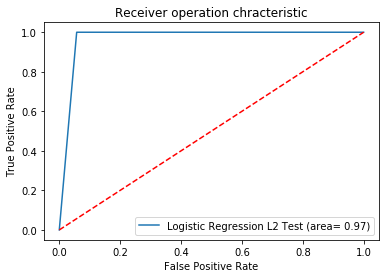

In [295]:
# Plot ROC and AUC
l2_roc_auc_test_psy = roc_auc_score(y_test_psy, y_logreg_pred_l2_test_psy)

plt.figure()
plt.plot(fpr_l2_test_psy, tpr_l2_test_psy, label="Logistic Regression L2 Test (area= %0.2f)" % l2_roc_auc_test_psy)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### E. L1-Penalized Logistic Regression

#### i. Determine lamda using five fold cross-validation

In [296]:
# Set up parameters
logistic_l1_psy = linear_model.LogisticRegression()
penalty_l1_psy = ["l1"]
parameters_l1_psy = {"C": c_psy, 
              "penalty": penalty_l1_psy, 
              "solver":["liblinear"]}

In [297]:
# Cross Validation
gridcv_l1_train_psy = GridSearchCV(logistic_l1_psy, parameters_l1_psy, cv = 5)
best_model_l1_train_psy = gridcv_l1_train_psy.fit(x_train_df_psy, y_train_psy)
best_c_l1_train_psy = best_model_l1_train_psy.best_estimator_.get_params()["C"]
print("Best C: ", best_c_l1_train_psy)

Best C:  10000.0


In [298]:
# Convert back to lamda value
index_c_l1_psy = c_psy.index(10000.0)
lambda_conversion_l1_psy = lambda_values_psy[index_c_l1_psy]
print("Best lambda: ", lambda_conversion_l1_psy)

Best lambda:  0.0001


#### ii. Train L-1 Penalized Logistic Regression

In [299]:
# Logistic Regression
logreg_l1_train_psy = LogisticRegression(penalty = "l1", C = best_c_l1_train_psy, solver = "liblinear")
logreg_l1_train_psy.fit(x_train_df_psy, y_train_psy)
y_logreg_pred_l1_train_psy = logreg_l1_train_psy.predict(x_train_df_psy)

#### iii. Test L-1 Penalized Logistic Regression

In [300]:
# Define independent and dependent variables
# The independent variable is x_test_df_sh
# The dependent variable is y_test_sh

In [301]:
# Logistic Regression
y_logreg_pred_l1_test_psy = logreg_l1_train_psy.predict(x_test_df_psy)

In [302]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_psy, y_logreg_pred_l1_test_psy))

0.9714285714285714


In [303]:
# Confusion matrix
cm_l1_test_psy = confusion_matrix(y_test_psy, y_logreg_pred_l1_test_psy)
cm_l1_test_psy

array([[34,  1],
       [ 1, 34]])

In [304]:
# Get values for true negative, false positive, false negative, and true positive
tn_l1_test_psy = cm_l1_test_psy[0][0]
fp_l1_test_psy = cm_l1_test_psy[0][1]
fn_l1_test_psy = cm_l1_test_psy[1][0]
tp_l1_test_psy = cm_l1_test_psy[1][1]

In [305]:
# Calculate precision
precision_l1_test_psy = tp_l1_test_psy/(tp_l1_test_psy + fp_l1_test_psy)
precision_l1_test_psy

0.9714285714285714

In [306]:
# Calculate recall
recall_l1_test_psy = tp_l1_test_psy/(tp_l1_test_psy + fn_l1_test_psy)
recall_l1_test_psy

0.9714285714285714

In [307]:
# Calculate f1-score
f1_l1_test_psy = 2*((precision_l1_test_psy*recall_l1_test_psy)/(precision_l1_test_psy+recall_l1_test_psy))
f1_l1_test_psy

0.9714285714285714

In [308]:
# ROC
fpr_l1_test_psy, tpr_l1_test_psy, _ = roc_curve(y_test_psy, y_logreg_pred_l1_test_psy, pos_label=1)

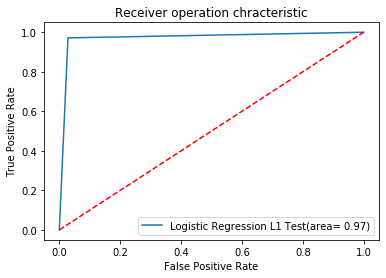

In [309]:
# Plot ROC and AUC
l1_roc_auc_test_psy = roc_auc_score(y_test_psy, y_logreg_pred_l1_test_psy)

plt.figure()
plt.plot(fpr_l1_test_psy, tpr_l1_test_psy, label="Logistic Regression L1 Test(area= %0.2f)" % l1_roc_auc_test_psy)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### F. Binary Classification Using Naive Bayes Classifiers

#### For training

In [310]:
# Naive Bayes
gnb_train_psy = GaussianNB()
gnb_train_psy.fit(x_train_df_psy, y_train_psy)
y_pred_gnb_train_psy = gnb_train_psy.predict(x_train_df_psy)

#### For test

In [311]:
# Naive Bayes
y_pred_gnb_test_psy = gnb_train_psy.predict(x_test_df_psy)

In [312]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_psy, y_pred_gnb_test_psy))

0.8714285714285714


In [313]:
# Confusion matrix
cm_gnb_test_psy = confusion_matrix(y_test_psy, y_pred_gnb_test_psy)
cm_gnb_test_psy

array([[30,  5],
       [ 4, 31]])

In [314]:
# Get values for true negative, false positive, false negative, and true positive
tn_gnb_test_psy = cm_gnb_test_psy[0][0]
fp_gnb_test_psy = cm_gnb_test_psy[0][1]
fn_gnb_test_psy = cm_gnb_test_psy[1][0]
tp_gnb_test_psy = cm_gnb_test_psy[1][1]

In [315]:
# Calculate precision
precision_gnb_test_psy = tp_gnb_test_psy/(tp_gnb_test_psy + fp_gnb_test_psy)
precision_gnb_test_psy

0.8611111111111112

In [316]:
# Calculate recall
recall_gnb_test_psy = tp_gnb_test_psy/(tp_gnb_test_psy + fn_gnb_test_psy)
recall_gnb_test_psy

0.8857142857142857

In [317]:
# Calculate f1-score
f1_gnb_test_psy = 2*((precision_gnb_test_psy*recall_gnb_test_psy)/(precision_gnb_test_psy+recall_gnb_test_psy))
f1_gnb_test_psy

0.8732394366197184

In [318]:
# ROC
fpr_gnb_test_psy, tpr_gnb_test_psy, _ = roc_curve(y_test_psy, y_pred_gnb_test_psy, pos_label=1)

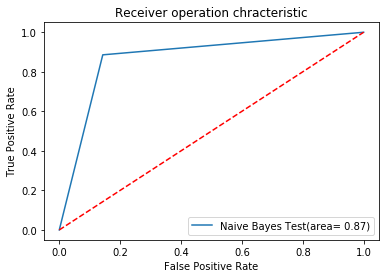

In [319]:
# Plot ROC and AUC
gnb_roc_auc_test_psy = roc_auc_score(y_test_psy, y_pred_gnb_test_psy)

plt.figure()
plt.plot(fpr_gnb_test_psy, tpr_gnb_test_psy, label="Naive Bayes Test(area= %0.2f)" % gnb_roc_auc_test_psy)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### G. Multinomial Priors

For training data

In [320]:
# Multinomial Naive Bayes
multi_train_psy = MultinomialNB()
multi_train_psy.fit(x_train_df_psy, y_train_psy)
y_multi_pred_train_psy = multi_train_psy.predict(x_train_df_psy)

For test data

In [321]:
# Multinomial Naive Bayes
multi_test_psy = MultinomialNB()
multi_test_psy.fit(x_train_df_psy, y_train_psy)
y_multi_pred_test_psy = multi_test_psy.predict(x_test_df_psy)

In [322]:
# Calculate accuracy
print(metrics.accuracy_score(y_test_psy, y_multi_pred_test_psy))

0.9571428571428572


In [323]:
# Confusion matrix
cm_multi_test_psy = confusion_matrix(y_test_psy, y_multi_pred_test_psy)
cm_multi_test_psy

array([[33,  2],
       [ 1, 34]])

In [324]:
# Get values for true negative, false positive, false negative, and true positive
tn_multi_test_psy = cm_multi_test_psy[0][0]
fp_multi_test_psy = cm_multi_test_psy[0][1]
fn_multi_test_psy = cm_multi_test_psy[1][0]
tp_multi_test_psy = cm_multi_test_psy[1][1]

In [325]:
# Calculate precision
precision_multi_test_psy = tp_multi_test_psy/(tp_multi_test_psy + fp_multi_test_psy)
precision_multi_test_psy

0.9444444444444444

In [326]:
# Calculate recall
recall_multi_test_psy = tp_multi_test_psy/(tp_multi_test_psy + fn_multi_test_psy)
recall_multi_test_psy

0.9714285714285714

In [327]:
# Calculate f1-score
f1_multi_test_psy = 2*((precision_multi_test_psy*recall_multi_test_psy)/(precision_multi_test_psy+recall_multi_test_psy))
f1_multi_test_psy

0.9577464788732395

In [328]:
# ROC
fpr_multi_test_psy, tpr_multi_test_psy, _ = roc_curve(y_test_psy, y_multi_pred_test_psy, pos_label=1)

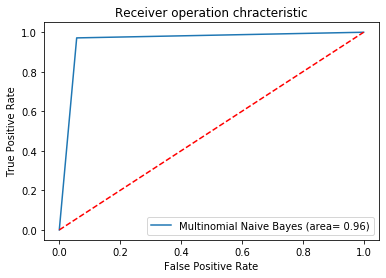

In [329]:
# Plot ROC and AUC
multi_roc_auc_test_psy = roc_auc_score(y_test_psy, y_multi_pred_test_psy)

plt.figure()
plt.plot(fpr_multi_test_psy, tpr_multi_test_psy, label="Multinomial Naive Bayes (area= %0.2f)" % multi_roc_auc_test_psy)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

In [330]:
from tabulate import tabulate

### Eminem

In [331]:
table_em = [["Instance", "Accuracy", "Precision", "Recall", "F1", "AUC"], 
            ["NB-Gaussian", "0.9222222222222223", precision_gnb_test, recall_gnb_test, f1_gnb_test_sh, gnb_roc_auc_test], 
            ["NB-Multinomial", "0.9776536312849162", precision_multi_test, recall_multi_test, f1_multi_test, multi_roc_auc_test],
            ["L2", "0.9777777777777777", precision_l2_test, recall_l2_test, f1_l2_test, l2_roc_auc_test],
            ["L1", "0.9555555555555556", precision_l1_test, recall_l1_test, f1_l1_test, l1_roc_auc_test]
           ]
print(tabulate(table_em, headers = "firstrow", tablefmt = "fancy_grid"))

╒════════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Instance       │   Accuracy │   Precision │   Recall │       F1 │      AUC │
╞════════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ NB-Gaussian    │   0.922222 │    0.888889 │ 0.979592 │ 0.909091 │ 0.916625 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ NB-Multinomial │   0.977654 │    0.844828 │ 1        │ 0.915888 │ 0.890244 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L2             │   0.977778 │    0.979592 │ 0.979592 │ 0.979592 │ 0.977601 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L1             │   0.955556 │    1        │ 0.938776 │ 0.968421 │ 0.969388 │
╘════════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


### Shakira

In [332]:
table_sh = [["Instance", "Accuracy", "Precision", "Recall", "F1", "AUC"], 
            ["NB-Gaussian", "0.906666666666666", precision_gnb_test_sh, recall_gnb_test_sh, f1_gnb_test_sh, gnb_roc_auc_test_sh], 
            ["NB-Multinomial", "0.9466666666666667", precision_multi_test_sh, recall_multi_test_sh, f1_multi_test_sh, multi_roc_auc_test_sh],
            ["L2", "0.9466666666666667", precision_l2_test_sh, recall_l2_test_sh, f1_l2_test_sh, l2_roc_auc_test_sh],
            ["L1", "0.96", precision_l1_test_sh, recall_l1_test_sh, f1_l1_test_sh, l1_roc_auc_test_sh]
           ]
print(tabulate(table_sh, headers = "firstrow", tablefmt = "fancy_grid"))

╒════════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Instance       │   Accuracy │   Precision │   Recall │       F1 │      AUC │
╞════════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ NB-Gaussian    │   0.906667 │    0.833333 │ 1        │ 0.909091 │ 0.9125   │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ NB-Multinomial │   0.946667 │    0.918919 │ 0.971429 │ 0.944444 │ 0.948214 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L2             │   0.946667 │    0.918919 │ 0.971429 │ 0.944444 │ 0.948214 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L1             │   0.96     │    0.944444 │ 0.971429 │ 0.957746 │ 0.960714 │
╘════════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


### LMFAO

In [333]:
table_lm = [["Instance", "Accuracy", "Precision", "Recall", "F1", "AUC"], 
            ["NB-Gaussian", "0.898876404494382", precision_gnb_test_lm, recall_gnb_test_lm, f1_gnb_test_lm, gnb_roc_auc_test_lm], 
            ["NB-Multinomial", "0.8764044943820225", precision_multi_test_lm, recall_multi_test_lm, f1_multi_test_lm, multi_roc_auc_test_lm],
            ["L2", "0.9213483146067416", precision_l2_test_lm, recall_l2_test_lm, f1_l2_test_lm, l2_roc_auc_test_lm],
            ["L1", "0.9213483146067416", precision_l1_test_lm, recall_l1_test_lm, f1_l1_test_lm, l1_roc_auc_test_lm]
           ]
print(tabulate(table_lm, headers = "firstrow", tablefmt = "fancy_grid"))

╒════════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Instance       │   Accuracy │   Precision │   Recall │       F1 │      AUC │
╞════════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ NB-Gaussian    │   0.898876 │    0.953488 │ 0.854167 │ 0.901099 │ 0.902693 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ NB-Multinomial │   0.876404 │    0.849057 │ 0.9375   │ 0.891089 │ 0.871189 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L2             │   0.921348 │    0.955556 │ 0.895833 │ 0.924731 │ 0.923526 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L1             │   0.921348 │    0.977273 │ 0.895833 │ 0.934783 │ 0.935722 │
╘════════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


### Katy Perry

In [334]:
table_kp = [["Instance", "Accuracy", "Precision", "Recall", "F1", "AUC"], 
            ["NB-Gaussian", "0.8571428571428571", precision_gnb_test_kp, recall_gnb_test_kp, f1_gnb_test_kp, gnb_roc_auc_test_kp], 
            ["NB-Multinomial", "0.9142857142857143", precision_multi_test_kp, recall_multi_test_kp, f1_multi_test_kp, multi_roc_auc_test_kp],
            ["L2", "0.9285714285714286", precision_l2_test_kp, recall_l2_test_kp, f1_l2_test_kp, l2_roc_auc_test_kp],
            ["L1", "0.9714285714285714", precision_l1_test_kp, recall_l1_test_kp, f1_l1_test_kp, l1_roc_auc_test_kp]
           ]
print(tabulate(table_kp, headers = "firstrow", tablefmt = "fancy_grid"))

╒════════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Instance       │   Accuracy │   Precision │   Recall │       F1 │      AUC │
╞════════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ NB-Gaussian    │   0.857143 │    0.820513 │ 0.914286 │ 0.864865 │ 0.857143 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ NB-Multinomial │   0.914286 │    0.939394 │ 0.885714 │ 0.911765 │ 0.914286 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L2             │   0.928571 │    0.941176 │ 0.914286 │ 0.927536 │ 0.928571 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L1             │   0.971429 │    0.970588 │ 0.942857 │ 0.956522 │ 0.957143 │
╘════════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛


### Psy

In [335]:
table_psy = [["Instance", "Accuracy", "Precision", "Recall", "F1", "AUC"], 
            ["NB-Gaussian", "0.8714285714285714", precision_gnb_test_psy, recall_gnb_test_psy, f1_gnb_test_psy, gnb_roc_auc_test_psy], 
            ["NB-Multinomial", "0.9571428571428572", precision_multi_test_psy, recall_multi_test_psy, f1_multi_test_psy, multi_roc_auc_test_psy],
            ["L2", "0.9714285714285714", precision_l2_test_psy, recall_l2_test_psy, f1_l2_test_psy, l2_roc_auc_test_psy],
            ["L1", "0.9857142857142858", precision_l1_test_psy, recall_l1_test_psy, f1_l1_test_psy, l1_roc_auc_test_psy]
           ]
print(tabulate(table_psy, headers = "firstrow", tablefmt = "fancy_grid"))

╒════════════════╤════════════╤═════════════╤══════════╤══════════╤══════════╕
│ Instance       │   Accuracy │   Precision │   Recall │       F1 │      AUC │
╞════════════════╪════════════╪═════════════╪══════════╪══════════╪══════════╡
│ NB-Gaussian    │   0.871429 │    0.861111 │ 0.885714 │ 0.873239 │ 0.871429 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ NB-Multinomial │   0.957143 │    0.944444 │ 0.971429 │ 0.957746 │ 0.957143 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L2             │   0.971429 │    0.945946 │ 1        │ 0.972222 │ 0.971429 │
├────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ L1             │   0.985714 │    0.971429 │ 0.971429 │ 0.971429 │ 0.971429 │
╘════════════════╧════════════╧═════════════╧══════════╧══════════╧══════════╛
